# Overview: 
## Our purpose is to build a Machine Learning model that can accurately predict future apartment prices in the capital city of Romania.   





# ***Exploratory Data Analysis (EDA)***

After scraping records from a popular real estate website in Romania, the analysis stage may begin. Let us first take a look at the dataset. This set of data contains many features that could impact change in apartment prices. It is fitting to make an attempt at explaining everything starting from the nature of the data, up until positive/negative relations between each existing feature. After clearly understanding how collected data behaves, and making vital changes (cleaning the data where necessary), the creation of a machine learning model can proceed. 

**Why should data be thoroughly inspected before fitting a model to it?** Since the aim of this project is to predict a given feature as accurately as possible, it is only appropriate to ensure the data is a good match for our model.

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVR
import folium
import json
import scipy.stats as stats
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

The **pandas library** allows for ideal comprehensive use of data. We shall create a **'DataFrame' object** (a structured way of representing datasets in pandas) and read the 'csv' (comma separated values) file which holds the extracted information. We would also like to see all of the existing columns, and ensure that if we change something in the dataset, we do it on a copy, so as to not negatively affect the true dataset which might prove useful later in time. 

In [2]:
pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
pd.pandas.set_option('display.max_rows', None)
df = pd.read_csv(r'C:\Users\Calin\Desktop\Personal-Project\WebScraping\apartamente2.csv')
df_copy = df.copy()

Let's look at the size of the dataset. Using one of the many functions that pandas provides, **the exact number of rows and columns is shown.**

In [3]:
df_copy.shape

(9981, 21)

To get a quick glance on the **first 5 values** of the dataframe, pandas comes to aid once again.

In [4]:
df_copy.head(55)

Unnamed: 0  Nr camere Suprafata utila  Suprafata utila totala  \
0            0    3.00000             131                     nan   
1            1    2.00000              67                87.00000   
2            2    2.00000              65                65.00000   
3            3    1.00000              52                52.00000   
4            4    4.00000             174                     nan   
5            5    5.00000             260                     nan   
6            6    3.00000         104,26                138.98000   
7            7    2.00000              47                     nan   
8            8    3.00000              70                     nan   
9            9    1.00000              34                     nan   
10          10    1.00000              38                38.00000   
11          11    2.00000              50                     nan   
12          12    1.00000              31                     nan   
13          13    2.00000              36                     nan   
14          14    2.00000              41                41.00000   
15          15    2.00000              55                55.00000   
16          16    6.00000             334                     nan   
17          17    2.00000              51                51.00000   
18          18    3.00000          80,15                      nan   
19          19    2.00000          46,18                 46.18000   
20          20    3.00000              72                     nan   
21          21    2.00000              67                67.00000   
22          22    2.00000              65                65.00000   
23          23    5.00000         288,56                      nan   
24          24    2.00000              58                58.00000   
25          25    2.00000              52                     nan   
26          26    4.00000          90,39                104.50000   
27          27    4.00000         196,07                206.00000   
28          28    2.00000          70,24                 70.24000   
29          29    2.00000              53                53.00000   
30          30    3.00000          70,12                 73.72000   
31          31    2.00000          69,57                 69.57000   
32          32    2.00000              46                     nan   
33          33    2.00000          70,09                 70.09000   
34          34    3.00000              67                67.00000   
35          35    2.00000              54                54.00000   
36          36    2.00000              51                58.00000   
37          37    3.00000              72                90.00000   
38          38    5.00000         241,83                      nan   
39          39    2.00000              60                60.00000   
40          40    2.00000              41                41.00000   
41          41    3.00000              77                     nan   
42          42    2.00000          83,45                      nan   
43          43    2.00000              48                52.00000   
44          44    2.00000              70                70.00000   
45          45    3.00000              67                     nan   
46          46    2.00000              63                63.00000   
47          47    2.00000              51                     nan   
48          48    3.00000          84,32                 91.50000   
49          49    1.00000              27                27.00000   
50          50    2.00000           54,5                 66.00000   
51          51    2.00000              46                     nan   
52          52    2.00000          51,04                      nan   
53          53    4.00000              91               102.00000   
54          54    3.00000              95                     nan   

   Suprafata construita Compartimentare Confort          Etaj  Nr. bucatarii  \
0                   NaN             NaN       1    Parter /

Should we opt for a different approach to checking records, another pandas function allows for **randomized observations** to appear as a result of a provided number. 

In [5]:
df_copy.sample(50)

Unnamed: 0  Nr camere Suprafata utila  Suprafata utila totala  \
5973        5973    1.00000              35                41.00000   
6222        6222    3.00000              73                     nan   
7913        7913    2.00000          56,44                      nan   
9383        9383    2.00000              59                     nan   
1755        1755    2.00000              52                57.00000   
1084        1084    1.00000           43,3                 46.99000   
8649        8649    1.00000              56                     nan   
4771        4771    2.00000           51,6                 60.15000   
2123        2123    2.00000              70                     nan   
7029        7029    3.00000              82                94.00000   
3570        3570    2.00000              60                     nan   
8089        8089    2.00000              57                64.00000   
1002        1002    3.00000          77,78                 77.78000   
2889        2889    2.00000              56                56.00000   
9743        9743    2.00000              43                     nan   
1554        1554    3.00000             197                     nan   
7175        7175    2.00000          50,64                      nan   
6526        6526    2.00000              80                     nan   
6729        6729    2.00000          57,42                      nan   
3427        3427    2.00000              54                     nan   
6363        6363    5.00000             200                     nan   
8477        8477    2.00000           52,4                 59.60000   
2326        2326    1.00000              27                     nan   
389          389    3.00000           76,6                131.40000   
4903        4903    1.00000              42                42.00000   
330          330    3.00000              79                79.00000   
1389        1389    2.00000              59                65.00000   
3674        3674    1.00000              40                45.00000   
4432        4432    2.00000              44                47.00000   
5872        5872    2.00000              63                74.00000   
3603        3603    2.00000              48                     nan   
193          193    3.00000              71                71.00000   
3134        3134    3.00000             100               100.00000   
4443        4443    1.00000              37                39.00000   
3791        3791    2.00000           45,2                      nan   
5509        5509    3.00000              76                91.00000   
3053        3053    2.00000          52,85                      nan   
1611        1611    2.00000          43,02                      nan   
4086        4086    2.00000              47                     nan   
9692        9692    3.00000              68                69.00000   
6245        6245    2.00000              56                     nan   
7984        7984    3.00000              52                     nan   
6105        6105    3.00000              73                85.00000   
6022        6022    4.00000          72,27                      nan   
7123        7123    3.00000              78                     nan   
1010        1010    2.00000              50                61.61000   
357          357    3.00000              90                     nan   
2079        2079    1.00000              45                45.00000   
2855        2855    2.00000              79                79.00000   
8073        8073    2.00000              46                     nan   

     Suprafata construita Compartimentare Confort          Etaj  \
5973                   41        decomand       1    Etaj 3 / 5   
6222                   76        decomand       1    Etaj 4 / 8   
7913                   66        decomand       1    Parter / 2   
9383                   64        decomand       1   Etaj 6 / 10   
1755                   67        decomand       1

It appears as though the **first column simply shows the position of each row.** This is due to the data being inside of a DataFrame before becoming a 'csv' file. Besides the fact that this type of information is not useful in any way, it may also be detrimental to our model, so dropping the column from the dataframe is how we treat this issue.

In [6]:
df_copy.drop('Unnamed: 0', inplace=True, axis=1)

Moreover, useful information about our data can further be deducted, such as **existing columns**, the number of values that are not null (the null values are empty cells, **regarded as missing values**), and also the **data type of each variable.** As observed, the dataset contains both numerical values (int64, float64) and either text or mixed numeric or non-numeric values (object). Columns containing numbers are the numerical (quantitative) variables of the dataset, while information presented by a certain category is regarded as a categorical (qualitative) variable, just as the name states.

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9980 non-null   float64
 1   Suprafata utila         9920 non-null   object 
 2   Suprafata utila totala  3560 non-null   float64
 3   Suprafata construita    8891 non-null   object 
 4   Compartimentare         9711 non-null   object 
 5   Confort                 9685 non-null   object 
 6   Etaj                    9980 non-null   object 
 7   Nr. bucatarii           8487 non-null   float64
 8   Nr. bai                 9483 non-null   float64
 9   An constructie          9814 non-null   object 
 10  Structura rezistenta    7434 non-null   object 
 11  Tip imobil              9941 non-null   object 
 12  Regim inaltime          9746 non-null   object 
 13  Nr. garaje              515 non-null    float64
 14  Nr. locuri parcare      2485 non-null   

The columns in the dataset contain many **missing values**. How we aproach this situation shall be disscussed further down the analysis stage. For now, let us simply see **the count** of missing values!




In [8]:
df_copy.isnull().sum()

Nr camere                    1
Suprafata utila             61
Suprafata utila totala    6421
Suprafata construita      1090
Compartimentare            270
Confort                    296
Etaj                         1
Nr. bucatarii             1494
Nr. bai                    498
An constructie             167
Structura rezistenta      2547
Tip imobil                  40
Regim inaltime             235
Nr. garaje                9466
Nr. locuri parcare        7496
Nr. balcoane              2584
Latitudine                   0
Longitudine                  0
Zona                       313
Pret                         0
dtype: int64

Another useful way of interpreting missing values is by identifying their **percentage**! To store the collumns, we use a **list comprehension**, a quick and compact way to append items into a list in Python. **The percentage** is computed by dividing the total number of variables from the count of each variable and multiplying by 100.

In [9]:
features_with_nan = [feature for feature in df_copy.columns if df[feature].isnull().sum() >= 1]

for feature in features_with_nan: 
    perc_features_with_nan = (df_copy[feature].isnull().sum() / len(df_copy[feature])) * 100
    print('{0} has {1} % missing values.'.format(feature, perc_features_with_nan))
    print('========'*10)
    
print('The number of columns with missing values is {}'.format(len(features_with_nan)))

Nr camere has 0.010019036168720569 % missing values.
Suprafata utila has 0.6111612062919547 % missing values.
Suprafata utila totala has 64.33223123935477 % missing values.
Suprafata construita has 10.920749423905422 % missing values.
Compartimentare has 2.7051397655545535 % missing values.
Confort has 2.965634705941288 % missing values.
Etaj has 0.010019036168720569 % missing values.
Nr. bucatarii has 14.96844003606853 % missing values.
Nr. bai has 4.9894800120228435 % missing values.
An constructie has 1.6731790401763351 % missing values.
Structura rezistenta has 25.51848512173129 % missing values.
Tip imobil has 0.40076144674882275 % missing values.
Regim inaltime has 2.3544734996493335 % missing values.
Nr. garaje has 94.84019637310891 % missing values.
Nr. locuri parcare has 75.1026951207294 % missing values.
Nr. balcoane has 25.88918945997395 % missing values.
Zona has 3.1359583208095385 % missing values.
The number of columns with missing values is 17


# ***Data Cleaning*** & ***Variable Transformation***

By taking a closer look at the 20 columns and their data types, it can be observed that most features do not match their given 'Dtypes'. This happens because typos and other different scenarios alter the records. As a result, let us transform them acordingly and provide proper reasoning. Most columns contain missing values. This calls for attentive care when deciding how to handle them later on.


1.   **'Suprafata utila'** (usable area) contains some missing values and its data type is object. Since all the records are numbers, why is it not of float data type?. The character ',' appears insead of '.'. European countries use ',' when '.' is expected and vice versa. This explaines why the website had used ',' compared to '.' and why float is the default data type for the column.The only change made was the conversion of ',' to '.'.


2.   It appears that **'Suprafata construita'** column contains both ',' and '.', thus turning it into 'object' data type. Moreover, it even has values with the character '.' appearing 2 times, so some changes are needed.


3.   The column's **'Etaj'** (floor) data type is object. We do not wish to change the data type, however we would like to make some other adjustments. Upon closer observation, the independent variable contains not only the floor, but also the total number of floors of the building. Since there already is another variable that presents the total number of floors, there is no need for such additional information.


4.   **'Nr. locuri parcare'** (Number of parking spots) is of object data type. In order to transform it into float, changes in certain records need to be made.


5.   The **'Pret'** column contains '.' instead of ',' to represent the thousandths decimals. Since ',' turns the variable into object type, we need to change the comma into an empty string (' ').




In [10]:
# Suprafata utila
bool_series_utila = df_copy['Suprafata utila'].str.contains(',')
nump_array_utila = np.where(bool_series_utila, df_copy['Suprafata utila'].str.replace(',', '.'), df_copy['Suprafata utila'])
df_copy['Suprafata utila'] = pd.DataFrame(nump_array_utila)
df_copy['Suprafata utila'] = df_copy['Suprafata utila'].astype('float64')


# Suprafata construita
bool_series_construita = df_copy['Suprafata construita'].str.contains(',')
nump_array_construita = np.where(bool_series_construita, df_copy['Suprafata construita'].str.replace(',', '.'), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita)
bool_series_construita_2 = df_copy['Suprafata construita'].str.contains('\d\d\.\d\d\d\.', regex = True)
nump_array_construita_2 = np.where(bool_series_construita_2, df_copy['Suprafata construita'].str.replace('.', ''), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita_2)
df_copy['Suprafata construita'] = df_copy['Suprafata construita'].astype('float64')


# Etaj
lst_etaj = list()
for item in df_copy['Etaj']:
    item = str(item)
    result = re.sub(' /\s\d+', '', item)
    lst_etaj.append(result)
df_copy['Etaj'] = pd.DataFrame(lst_etaj, columns = ['Etaj'])


# Nr. locuri parcare
lst_locuri_parcare = list()
for item in df_copy['Nr. locuri parcare']:
    item = str(item)
    result = re.sub(r'-\sI.*', '', item)
    lst_locuri_parcare.append(result)
df_copy['Nr. locuri parcare'] = pd.DataFrame(lst_locuri_parcare, columns = ['Nr. locuri parcare'])
df_copy['Nr. locuri parcare'] = df_copy['Nr. locuri parcare'].astype('float64')


# Pret 
bool_series_pret = df_copy['Pret'].str.contains('.\d*', regex = True)
nump_array_pret = np.where(bool_series_pret, df_copy['Pret'].str.replace('.', ''), df_copy['Pret'])
df_copy['Pret'] = pd.DataFrame(nump_array_pret)
df_copy['Pret'] = df_copy['Pret'].astype('float64')


# An constructie
df_copy['An constructie'] = df_copy['An constructie'].astype('category')
cat = pd.Categorical(df_copy['An constructie'])
lst_of_categories_to_delete = ['Între 1941 şi 1977', 'Între 1977 şi 1990', 'Între 1990 şi 2000', 'Între 2000 şi 2010', 'După 2010', 'Înainte de 1941', 'Înainte de 1990']
df_copy['An constructie'] = cat.remove_categories(lst_of_categories_to_delete) 
df_copy['An constructie'] = df_copy['An constructie'].astype('object')


def new_col_an(item):
    try:
        if '(in constructie)' in item or '(proiect)' in item: 
            return 'In constructie'
        elif '(finalizata)' in item or ('(in constructie)' not in item and '(proiect)' not in item): 
            return 'Finalizat'
    except TypeError:
            return np.nan      

        
df_copy['Finalizat/In constructie'] = df_copy['An constructie'].apply(new_col_an)

lst_an_const = list()
for item in df_copy['An constructie']:
    item = str(item)
    result = re.sub(r'\(.*', '', item)
    lst_an_const.append(result)
df_copy['An constructie'] = pd.DataFrame(lst_an_const, columns = ['An constructie'])
df_copy['An constructie'] = df_copy['An constructie'].astype('object')


# Nr. balcoane
def new_col_balcoane(item):
    try:
        if '(închise)' in item: 
            return 'inchis'
        else:
            return 'deschis'
    except TypeError:
            return np.nan    
        
        
df_copy['Inchise/Deschise'] = df_copy['Nr. balcoane'].apply(new_col_balcoane) 

lst_balcoane = list()
for item in df_copy['Nr. balcoane']:
    item = str(item)
    result = re.sub(r'\(.*', '', item)
    lst_balcoane.append(result)
df_copy['Nr. balcoane'] = pd.DataFrame(lst_balcoane, columns = ['Nr. balcoane'])
df_copy['Nr. balcoane'] = df_copy['Nr. balcoane'].astype('object')


# Nr. bucatarii
df_copy['Nr. bucatarii'] = df_copy['Nr. bucatarii'].astype('object')

# Nr. bai
df_copy['Nr. bai'] = df_copy['Nr. bai'].astype('object')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nr camere                 9980 non-null   float64
 1   Suprafata utila           9920 non-null   float64
 2   Suprafata utila totala    3560 non-null   float64
 3   Suprafata construita      8891 non-null   float64
 4   Compartimentare           9711 non-null   object 
 5   Confort                   9685 non-null   object 
 6   Etaj                      9981 non-null   object 
 7   Nr. bucatarii             8487 non-null   object 
 8   Nr. bai                   9483 non-null   object 
 9   An constructie            9981 non-null   object 
 10  Structura rezistenta      7434 non-null   object 
 11  Tip imobil                9941 non-null   object 
 12  Regim inaltime            9746 non-null   object 
 13  Nr. garaje                515 non-null    float64
 14  Nr. locu

Through the scraping process the **latitude** and **longitude** coodinates of apartments are present in the dataset. A quick visualization of the city's map is a great way to get a feel of the real position of the apartments. Inside the dataset there is another useful variable called **'Zone'**. The column contains the most popular areas of the city that each apartment is in. 
**So a few questions arise.**





In [12]:
BUC_LAT = 44.4268
BUC_LON = 26.1025

with open(r'C:\Users\Calin\Desktop\testingshit\sectoare_bucuresti.geojson', 'r') as f:
    data = json.load(f)


lat, lon = df_copy['Latitudine'], df_copy['Longitudine']
basic_map = folium.Map(location=[BUC_LAT, BUC_LON],zoom_start=11)

folium.GeoJson(data, name="geojson").add_to(basic_map)
FastMarkerCluster(data=list(zip(lat, lon))).add_to(basic_map)
folium.LayerControl().add_to(basic_map)

In [13]:
basic_map

Do we really need these variables in the dataset? And how will they affect our model? It is useful to use the latitude and longitude of apartments as a way to explain a certain location, when a better independent variable that already holds such locations exists? The choice I made was to drop both the **'Latitudine'** and **'Longitudine'** columns and use the **'Zone'** column to explain the location of the records.

In [14]:
df_copy.drop('Latitudine', inplace=True, axis=1)
df_copy.drop('Longitudine', inplace=True, axis=1)

In [15]:
df_copy.head(10)

Nr camere  Suprafata utila  Suprafata utila totala  Suprafata construita  \
0    3.00000        131.00000                     nan                   nan   
1    2.00000         67.00000                87.00000                   nan   
2    2.00000         65.00000                65.00000              65.00000   
3    1.00000         52.00000                52.00000              68.00000   
4    4.00000        174.00000                     nan             207.00000   
5    5.00000        260.00000                     nan             300.00000   
6    3.00000        104.26000               138.98000             173.00000   
7    2.00000         47.00000                     nan              53.00000   
8    3.00000         70.00000                     nan              72.00000   
9    1.00000         34.00000                     nan              38.00000   

  Compartimentare Confort      Etaj Nr. bucatarii Nr. bai An constructie  \
0             NaN       1   Parter        1.00000 1.00000           2020   
1        decomand       1   Etaj 2        1.00000 1.00000           2020   
2        decomand       1   Etaj 1        1.00000 1.00000           2020   
3        decomand     lux  Etaj 10        1.00000 1.00000           2016   
4        decomand     lux   Etaj 5        1.00000 3.00000          2021    
5        decomand     lux   Etaj 5        1.00000 3.00000           2021   
6        decomand     lux   Etaj 9        1.00000 2.00000           2020   
7        decomand     lux   Etaj 2        1.00000 1.00000          2021    
8        decomand     lux   Etaj 2        1.00000 2.00000          2021    
9        decomand     lux   Etaj 1        1.00000 1.00000          2021    

  Structura rezistenta           Tip imobil Regim inaltime  Nr. garaje  \
0                beton  bloc de apartamente           P+5E         nan   
1                beton  bloc de apartamente           P+4E         nan   
2                beton  bloc de apartamente           P+5E         nan   
3                beton  bloc de apartamente        S+P+10E         nan   
4                beton  bloc de apartamente         D+P+5E         nan   
5                beton  bloc de apartamente         D+P+5E         nan   
6                beton  bloc de apartamente        S+P+11E         nan   
7                beton  bloc de apartamente         D+P+4E     1.00000   
8                beton  bloc de apartamente           P+4E         nan   
9                beton  bloc de apartamente           P+4E         nan   

   Nr. locuri parcare Nr. balcoane            Zona         Pret  \
0             1.00000          nan  Drumul Taberei  75600.00000   
1             1.00000            2  Drumul Taberei  35800.00000   
2                 nan           1   Drumul Taberei  42400.00000   
3                 nan           1   Drumul Taberei  43500.00000   
4                 nan            1       Herăstrău 399888.00000   
5                 nan          nan       Herăstrău 675000.00000   
6             1.00000            2       Herăstrău 315000.00000   
7             1.00000            1        Militari  41000.00000   
8             1.00000            1        Militari  60000.00000   
9             1.00000            1        Militari  28000.00000   

  Finalizat/In constructie Inchise/Deschise  
0                Finalizat              NaN  
1                Finalizat          deschis  
2                Finalizat           inchis  
3                Finalizat           inchis  
4           In constructie          deschis  
5                Finalizat              NaN  
6                Finalizat          deschis  
7           In constructie          deschis  
8           In constructie          deschis  
9           In constructie          deschis

# ***Univariate Analysis***


## 1. Categorical Variables

We seek to analyse **each independent variable** in order to find important statistical information about the data. Our dataset now contains 18 columns as mentioned previously, consisting of both continous and numerical values in nature. We shall first look at the **frequency table** for every categorical independent variable present. Visually interpreting the table provides for greater in depth understanding, hence the reasoning behind using **Bar plots** for this task. The count can be plainly depicted from the plots, whereas the number of **distinct values** and the **percentage of counts** for each category have been printed below the graph.

There are 13 categorical variables in our dataset.


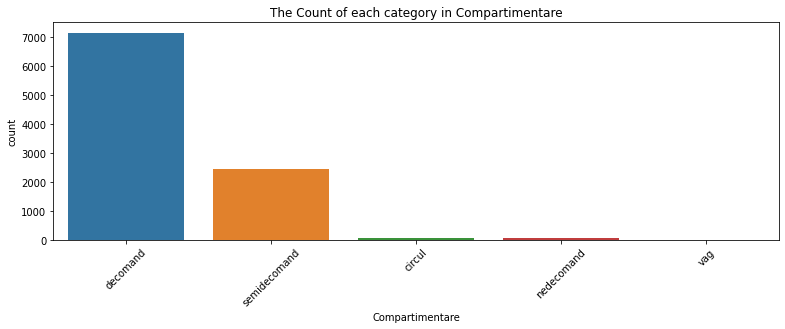

Number of unique values in Compartimentare is: 6
decomand       73.58665
semidecomand   25.11585
circul          0.71053
nedecomand      0.57667
vag             0.01030
Name: Compartimentare, dtype: float64


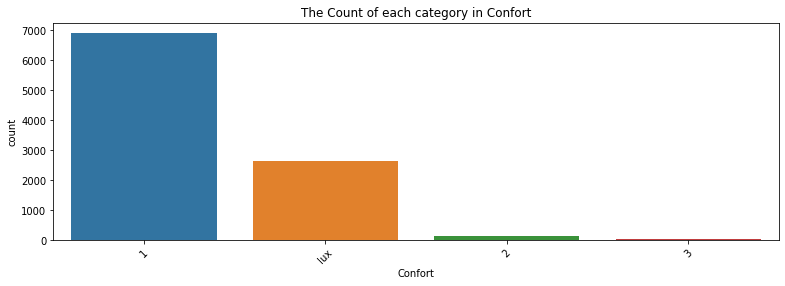

Number of unique values in Confort is: 5
1     71.28549
lux   27.09344
2      1.43521
3      0.18585
Name: Confort, dtype: float64


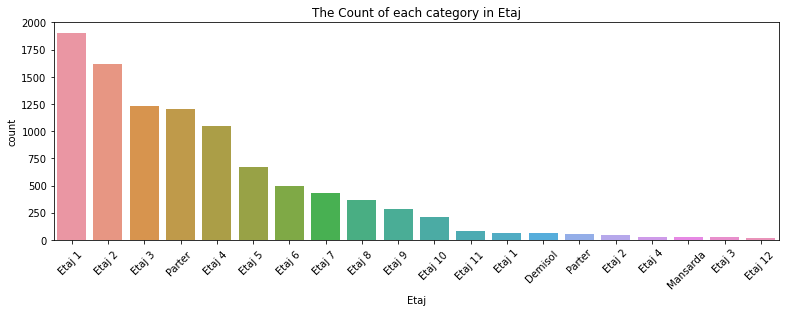

Number of unique values in Etaj is: 39
Etaj 1              19.08626
Etaj 2              16.18074
Etaj 3              12.35347
Parter              12.04288
Etaj 4              10.45987
Etaj 5               6.71275
Etaj 6               4.91935
Etaj 7               4.27813
Etaj 8               3.70704
Etaj 9               2.83539
Etaj 10              2.08396
Etaj 11              0.83158
Etaj 1               0.65124
Demisol              0.63120
Parter               0.51097
Etaj 2               0.41078
Etaj 4               0.30057
Mansarda             0.30057
Etaj 3               0.25048
Etaj 12              0.20038
Ultimele 2 etaje     0.19036
Etaj 8               0.17032
Etaj 5               0.14027
Etaj 7               0.13025
Etaj 6               0.08015
Etaj 14              0.07013
Etaj 15              0.07013
Etaj 10              0.07013
Etaj 13              0.06011
Etaj 11              0.05010
Demisol              0.04008
Etaj 18              0.03006
Etaj 16              0.03006
Mans

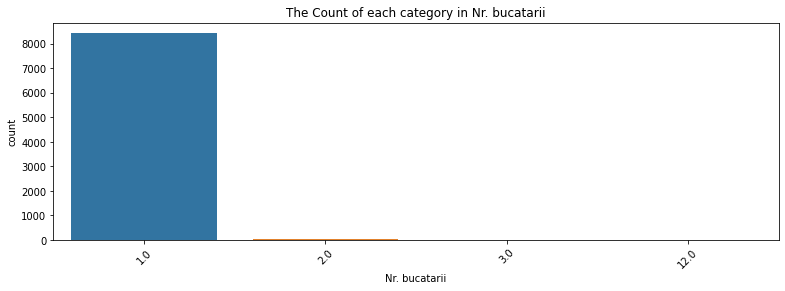

Number of unique values in Nr. bucatarii is: 5
1.00000    99.46978
2.00000     0.47131
3.00000     0.04713
12.00000    0.01178
Name: Nr. bucatarii, dtype: float64


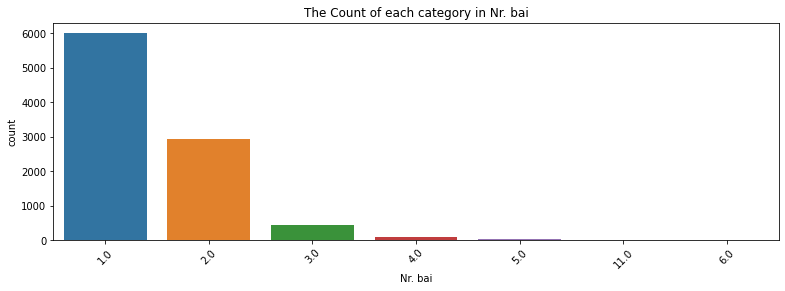

Number of unique values in Nr. bai is: 8
1.00000    63.38711
2.00000    30.96067
3.00000     4.49225
4.00000     0.98070
5.00000     0.15818
11.00000    0.01055
6.00000     0.01055
Name: Nr. bai, dtype: float64


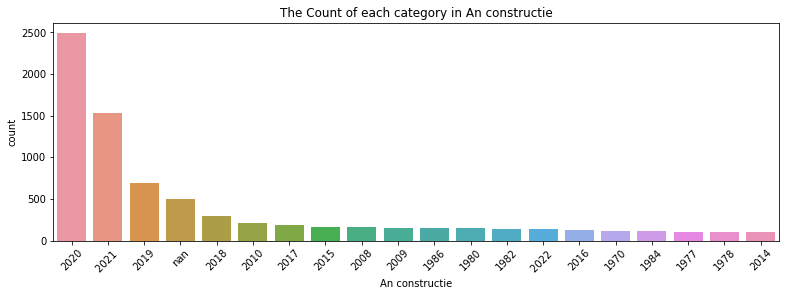

Number of unique values in An constructie is: 110
2020    24.92736
2021    15.33914
2019     6.94319
nan      4.98948
2018     2.96563
2010     2.07394
2017     1.91364
2015     1.68320
2008     1.65314
2009     1.56297
1986     1.55295
1980     1.46278
1982     1.37261
2022     1.34255
2016     1.28244
1970     1.20228
1984     1.18225
1977     1.05200
1978     1.03196
2014     1.01192
1976     0.99188
2012     0.96183
1975     0.92175
1990     0.87166
1985     0.87166
2007     0.85162
1940     0.84160
1974     0.81154
2011     0.77147
2013     0.74141
1965     0.70133
1987     0.69131
1968     0.67128
1979     0.67128
1981     0.61116
1960     0.58110
1983     0.57109
1992     0.51097
2006     0.48091
1972     0.48091
1989     0.42080
1988     0.39074
2000     0.38072
1973     0.37070
1991     0.35067
1969     0.32061
2021     0.31059
1996     0.29055
2005     0.28053
1967     0.27051
1938     0.26049
1994     0.24046
1936     0.24046
2004     0.22042
2003     0.22042
1997     0.2204

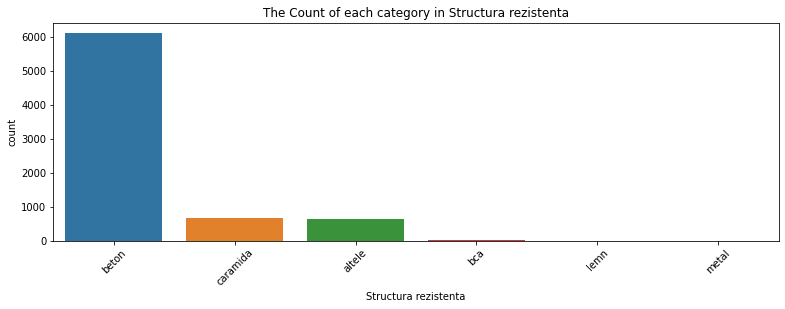

Number of unique values in Structura rezistenta is: 7
beton      82.24374
caramida    9.02610
altele      8.62255
bca         0.05381
lemn        0.02690
metal       0.02690
Name: Structura rezistenta, dtype: float64


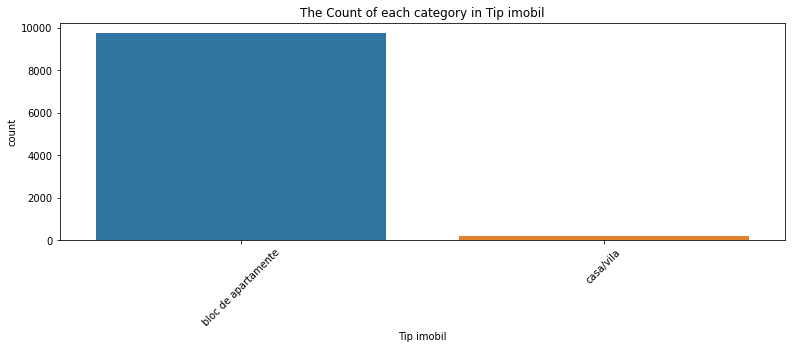

Number of unique values in Tip imobil is: 3
bloc de apartamente   98.14908
casa/vila              1.85092
Name: Tip imobil, dtype: float64


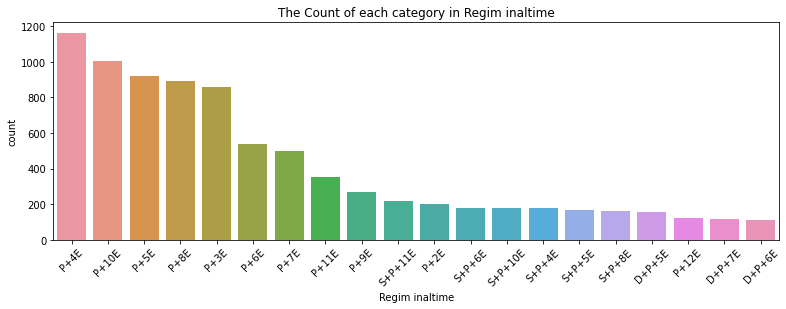

Number of unique values in Regim inaltime is: 110
P+4E          11.94336
P+10E         10.29140
P+5E           9.43977
P+8E           9.15247
P+3E           8.80361
P+6E           5.50995
P+7E           5.10979
P+11E          3.63226
P+9E           2.77037
S+P+11E        2.23682
P+2E           2.08291
S+P+6E         1.83665
S+P+10E        1.81613
S+P+4E         1.80587
S+P+5E         1.71352
S+P+8E         1.67248
D+P+5E         1.63144
P+12E          1.27232
D+P+7E         1.19023
D+P+6E         1.15945
S+P+7E         1.06710
S+P+3E         0.89267
D+P+4E         0.86189
D+P+8E         0.82085
D+P+3E         0.70798
P+2E+M         0.62590
S+P+12E        0.62590
S+P+9E         0.62590
P+3E+M         0.52329
S+P+2E+M       0.37964
P+1E           0.37964
S+P            0.32834
P+13E          0.30782
D+P+11E        0.29756
P+5E+M         0.26678
D+P+10E        0.26678
P+14E          0.25652
D+P+8E+M       0.24625
S+P+3E+M       0.24625
D+P+2E         0.22573
D+P+3E+M       0.22573
P+16E  

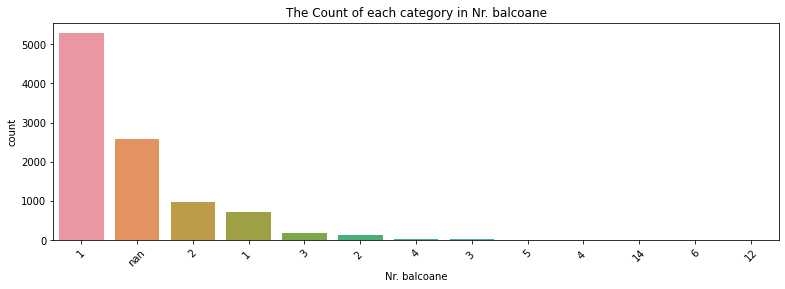

Number of unique values in Nr. balcoane is: 13
1     52.90051
nan   25.88919
2      9.84871
1      7.17363
3      1.86354
2      1.41268
4      0.46088
3      0.26049
5      0.09017
4      0.07013
14     0.01002
6      0.01002
12     0.01002
Name: Nr. balcoane, dtype: float64


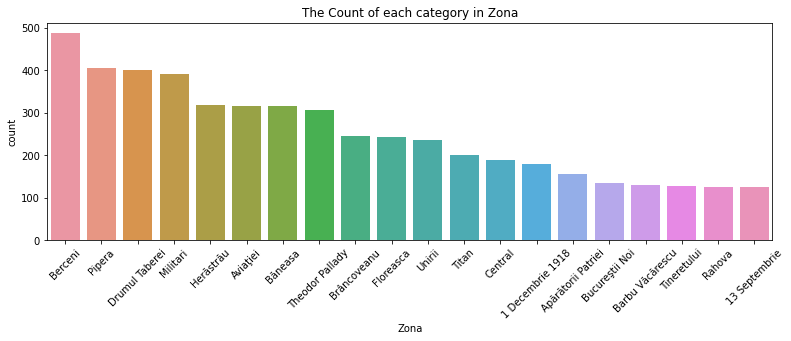

Number of unique values in Zona is: 223
Berceni                 5.03724
Pipera                  4.18908
Drumul Taberei          4.13736
Militari                4.04427
Herăstrău               3.29954
Aviaţiei                3.27886
Băneasa                 3.26851
Theodor Pallady         3.17542
Brâncoveanu             2.54448
Floreasca               2.51345
Unirii                  2.44104
Titan                   2.07902
Central                 1.96525
1 Decembrie 1918        1.85147
Apărătorii Patriei      1.61357
Bucureştii Noi          1.38602
Barbu Văcărescu         1.34464
Tineretului             1.32396
Rahova                  1.30327
13 Septembrie           1.30327
Pantelimon              1.26189
Prelungirea Ghencea     1.23086
Dristor                 1.22052
Domenii                 1.17915
Dorobanţi               1.06537
Lujerului               1.04468
Colentina               1.04468
Ştefan cel Mare         1.04468
Mihai Bravu             0.95159
Sud                     0.91022


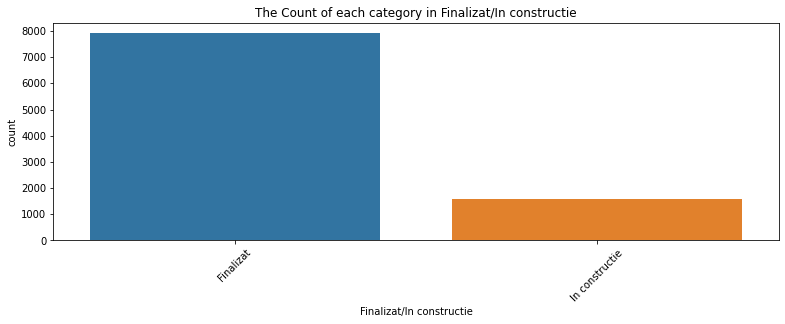

Number of unique values in Finalizat/In constructie is: 3
Finalizat        83.38079
In constructie   16.61921
Name: Finalizat/In constructie, dtype: float64


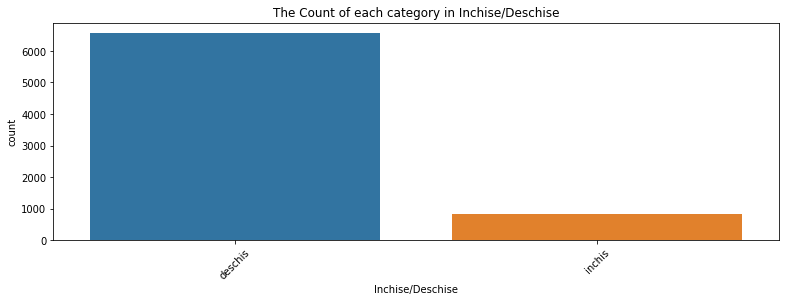

Number of unique values in Inchise/Deschise is: 3
deschis   88.84683
inchis    11.15317
Name: Inchise/Deschise, dtype: float64


In [16]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']
print('There are {} categorical variables in our dataset.'.format(len(categorical_features)))

for feature in categorical_features:
    plt.figure(figsize=(13, 4))
    sns.countplot(feature, data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
    plt.title('The Count of each category in {}'.format(feature))
    plt.xticks(rotation=45)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique())))
    print(df_copy[feature].value_counts(normalize=True) * 100)

## 2. Numerical Variables

With regards to numerical variables, we will try to deduce some statistical details i.e. the **central tendency** (where the center of our data is) and **measures of dispersion** (how spread the data are). **Mean, median and mode** are the 3 central tendency measures. Mean is commonly used but very sensitive to extreme values, median however, is expected to be utilized in such cases. Mode should be applied for categorical data. **Variance and standard deviation** explain the spread of data around a central value. Represented below are the count, mean, standard deviation, and the 5 quartiles of each independent numerical variable. 

In [17]:
df_copy.describe()

Nr camere  Suprafata utila  Suprafata utila totala  \
count 9980.00000       9920.00000              3560.00000   
mean     2.46413         72.42956                76.87635   
std      0.94302         39.75702               153.51875   
min      1.00000          5.63000                15.00000   
25%      2.00000         50.36000                53.00000   
50%      2.00000         63.00000                63.15000   
75%      3.00000         82.00000                84.00000   
max     15.00000        621.00000              8866.00000   

       Suprafata construita  Nr. garaje  Nr. locuri parcare          Pret  
count            8891.00000   515.00000          2485.00000    9981.00000  
mean               88.80934     1.36311             1.56700  132852.93237  
std                56.82269     3.56188             5.43369  180060.18043  
min                 1.09200     1.00000             1.00000   16500.00000  
25%                60.00000     1.00000             1.00000   62300.00000  
50%                74.00000     1.00000             1.00000   86900.00000  
75%                98.00000     1.00000             1.00000  139500.00000  
max               880.00000    58.00000            99.00000 6000000.00000

Also, we would like to see how the **distribution our data** falls under presents itself. Many numerical variables contain **outliers** (extreme values that could negatively impact statistical analysis). To visualise this, we will be utilizing **Histograms** and Box-And-Whiskers plots a.k.a **Box plots**. Box plots are composed of **5 stages**, mentioned previously, which statistically explain the data, these are: **minimum value, 1st quartile, median, 3rd quartile, and maximum value**. Most importantly, box plots reveal the outliers of our data as well. We can clearly see that many of our numerical variables contain outliers. Fully understanding the negative impacts of outliers will prove to be a valuable skill in deciding what the solution for treating them should be:

- Outliers increase residual error 
- Outliers decrease power of statistical tests
- Outliers may decrease normality
-  Outliers may impact the assumptions of Regression



There are 7 numerical variables in our dataset.
Number of unique values in Nr camere is: 13
Number of unique values in Suprafata utila is: 1483
Number of unique values in Suprafata utila totala is: 729
Number of unique values in Suprafata construita is: 1267
Number of unique values in Nr. garaje is: 7
Number of unique values in Nr. locuri parcare is: 22
Number of unique values in Pret is: 2184


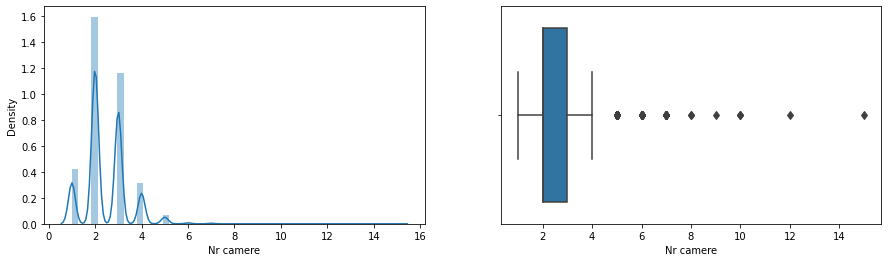

<Figure size 936x288 with 0 Axes>

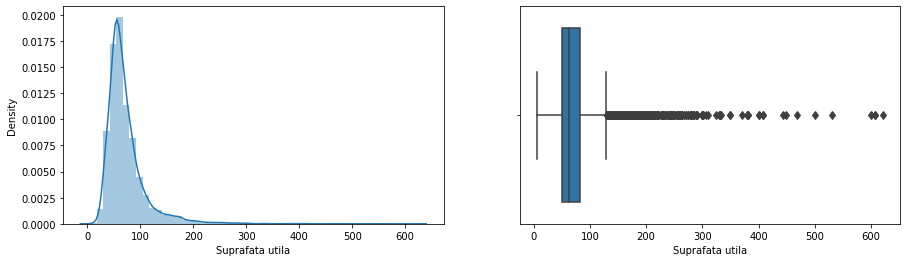

<Figure size 936x288 with 0 Axes>

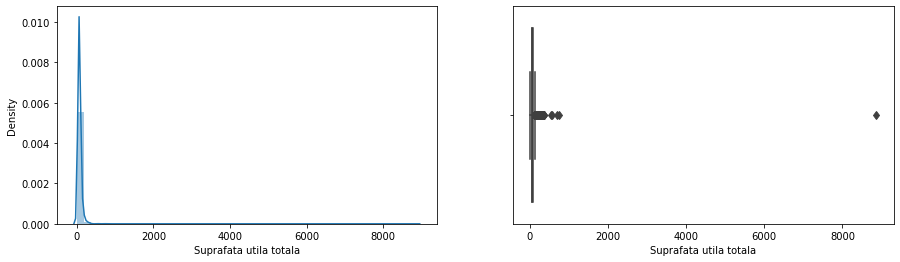

<Figure size 936x288 with 0 Axes>

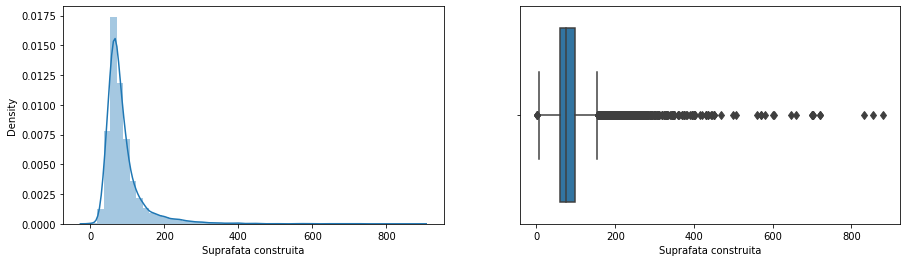

<Figure size 936x288 with 0 Axes>

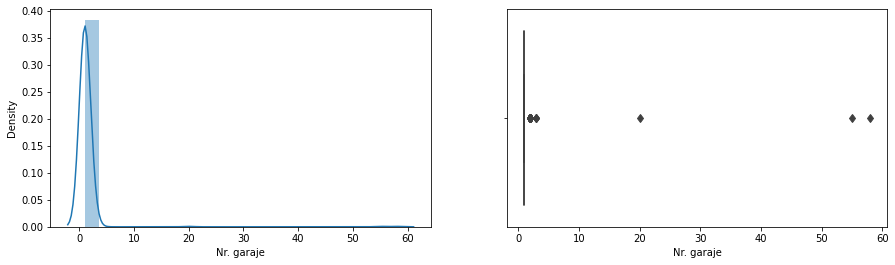

<Figure size 936x288 with 0 Axes>

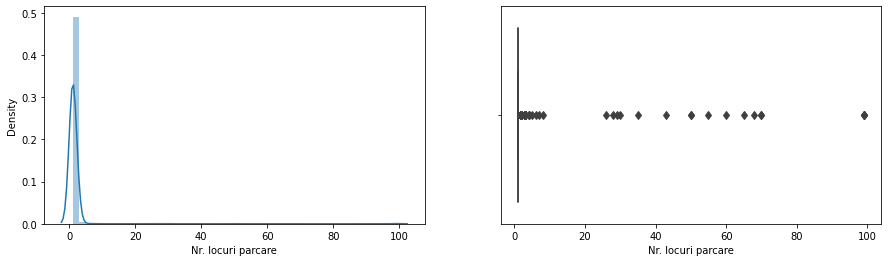

<Figure size 936x288 with 0 Axes>

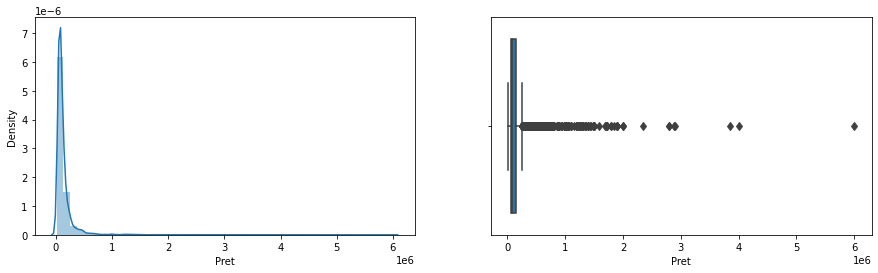

<Figure size 936x288 with 0 Axes>

In [18]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
print('There are {} numerical variables in our dataset.'.format(len(numerical_features)))

for feature in numerical_features:
    fig, ax = plt.subplots(ncols = 2, figsize=(15, 4))
    plt.figure(figsize=(13, 4))
    sns.distplot(df_copy[feature], ax=ax[0])
    sns.boxplot(df_copy[feature], ax=ax[1], fliersize=6)
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique()))) 

# ***Bivariate Analysis***

## 1. Numerical & Numerical


Let us analyse the relationships between all the numerical variables of our dataset. We shall learn about **correlation** and its importance. The correlation is a **statistical measure** which states the extent to which 2 variables are linearly related. It is important to understand whether the independent variables are correlated with the other variables or if no correlation is present and also the **strength of these relations**. The final predictions will benefit greatly from such insights. If there is high correlation, the predictions will be more accurate. We can check the relationships between our variables by using a **scatterplot** and the seaborn library offers this tool.


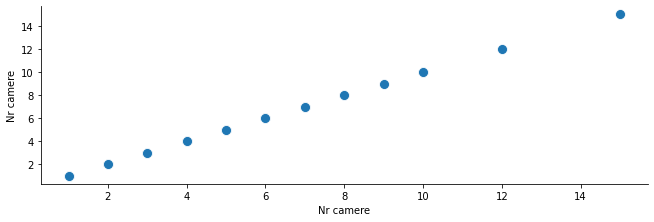

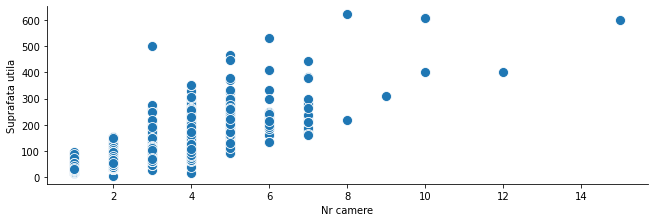

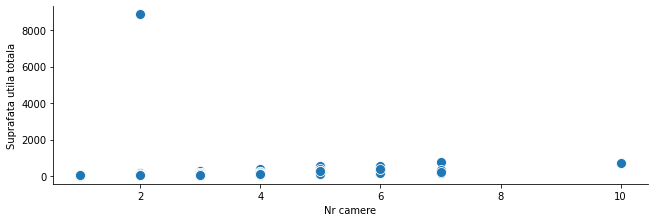

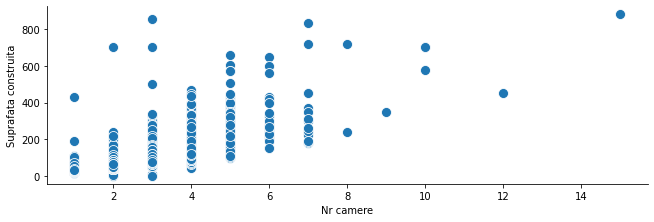

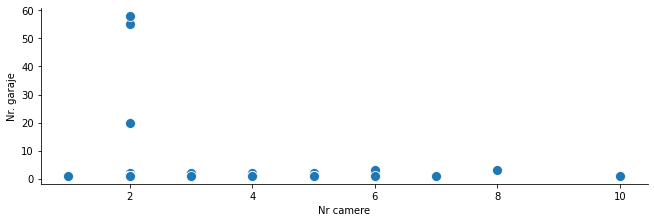

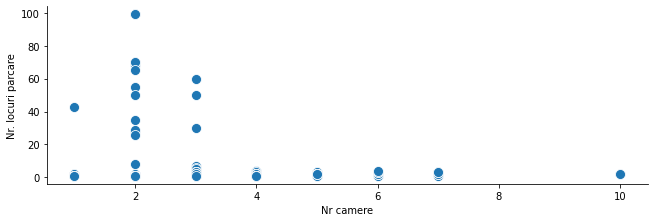

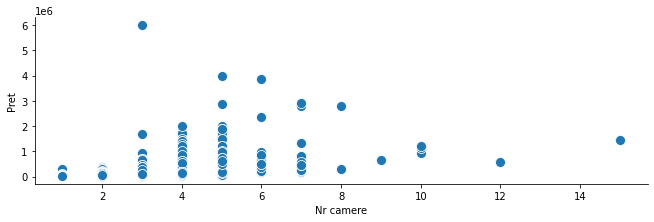

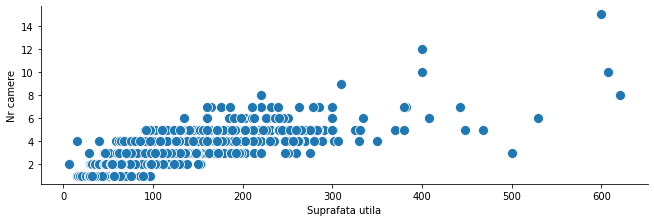

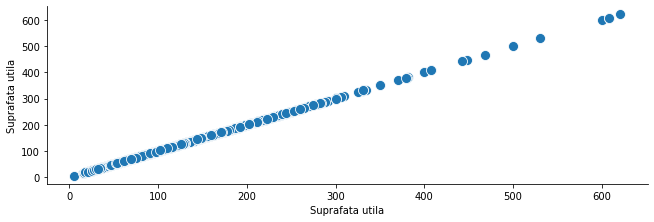

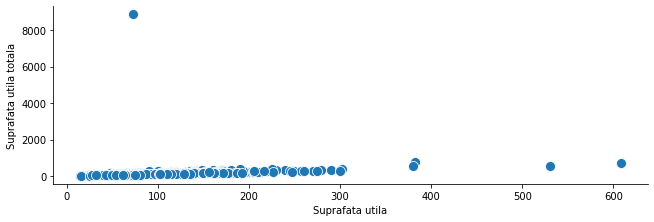

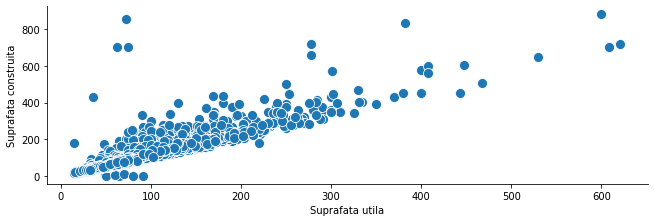

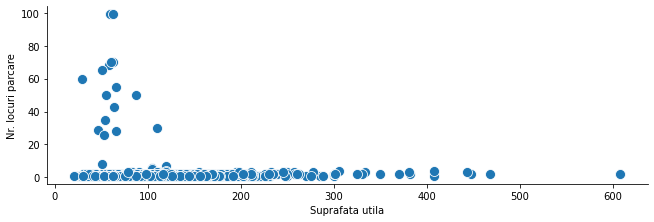

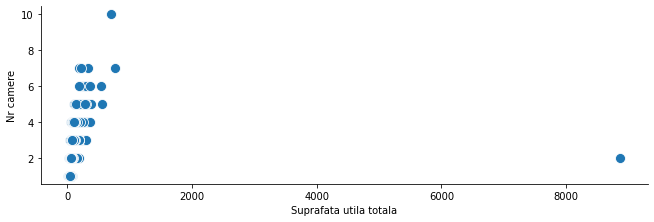

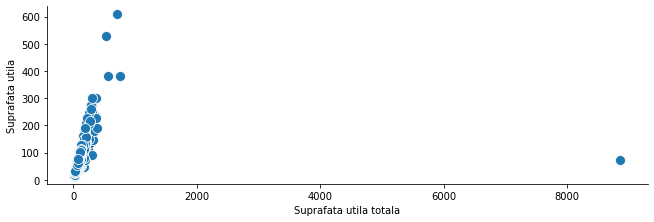

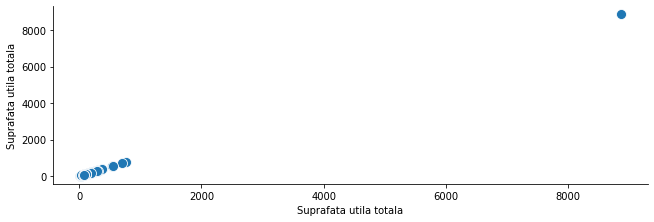

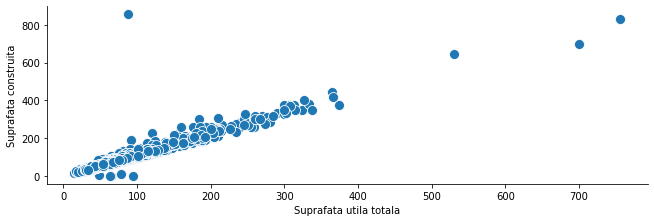

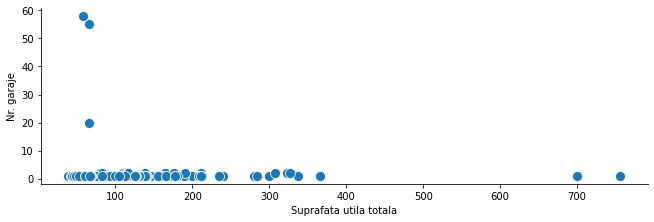

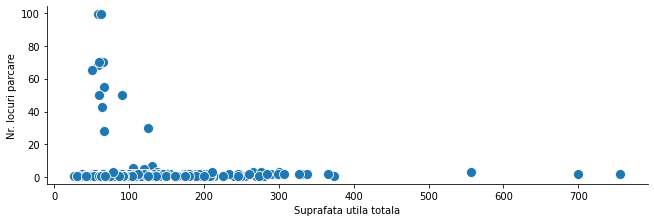

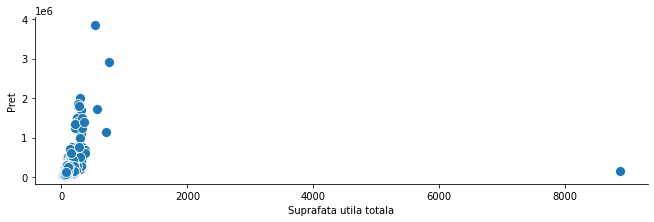

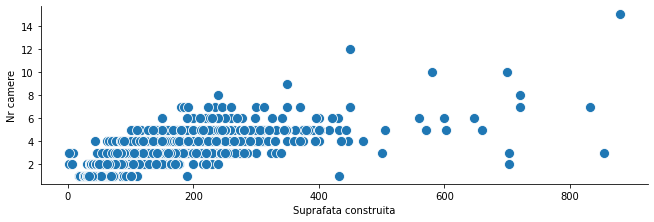

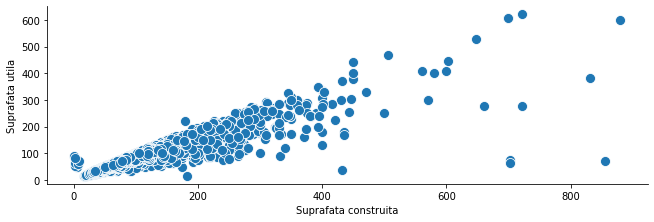

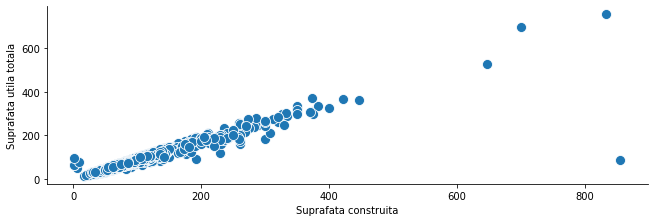

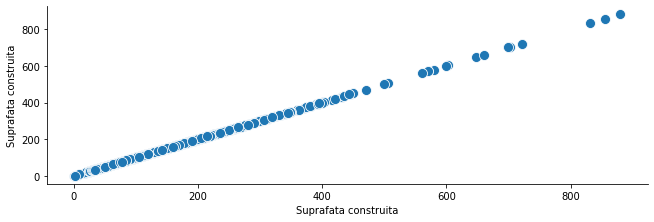

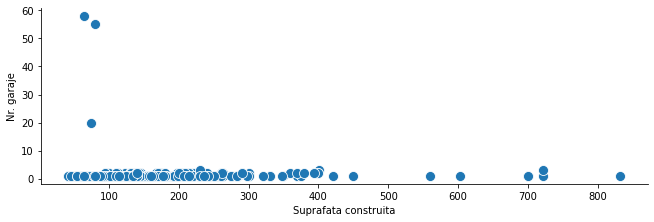

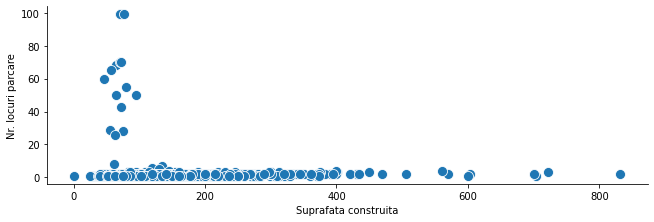

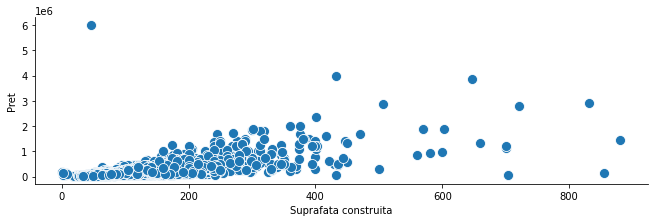

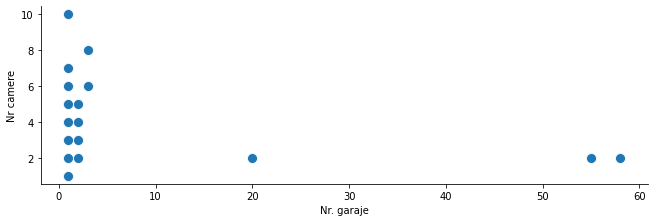

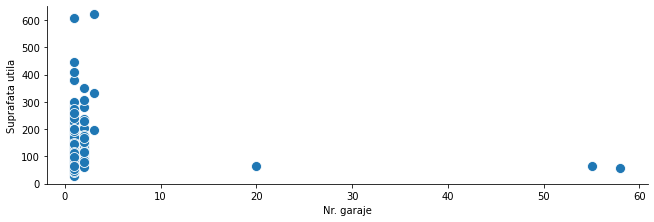

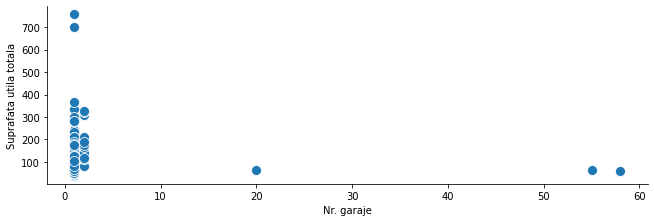

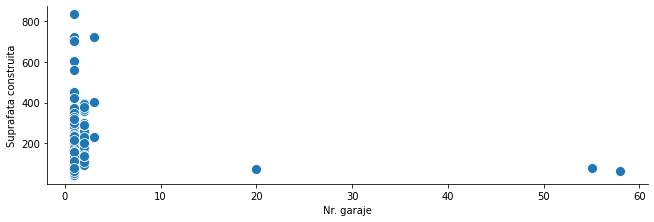

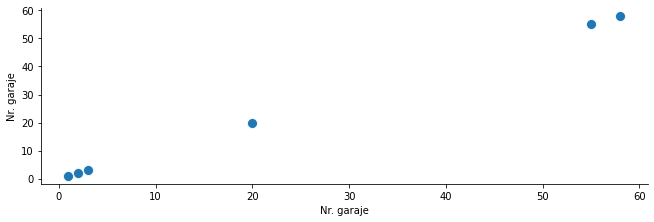

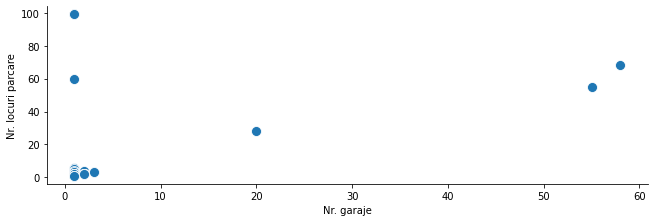

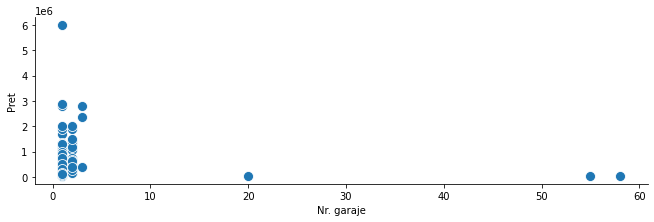

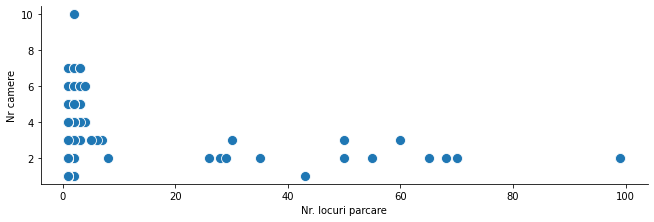

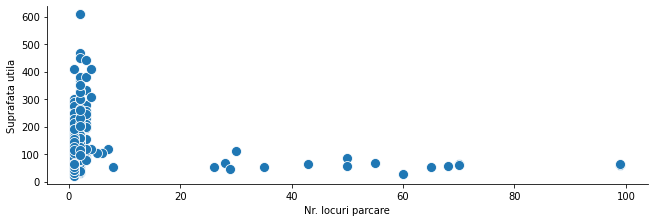

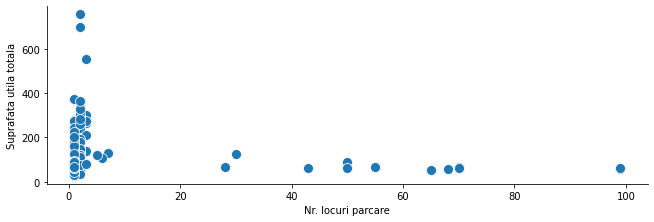

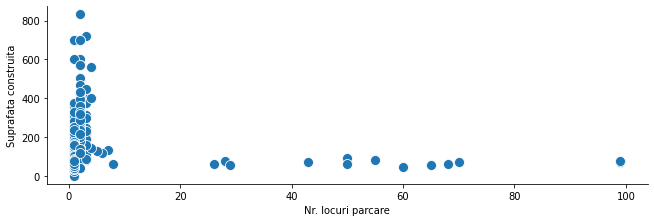

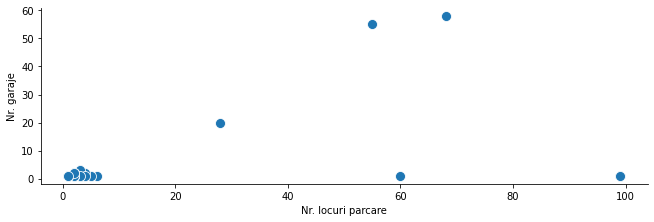

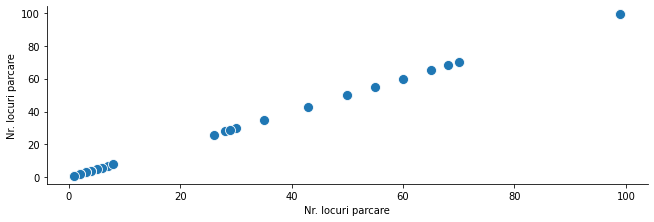

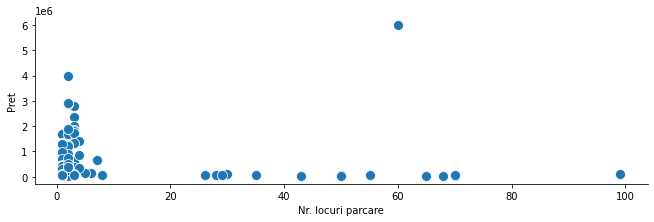

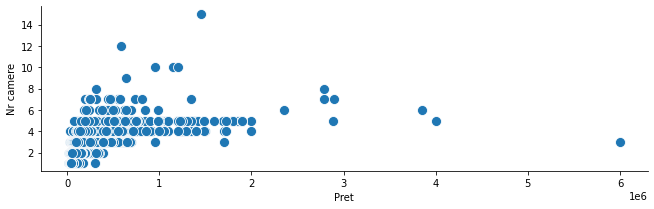

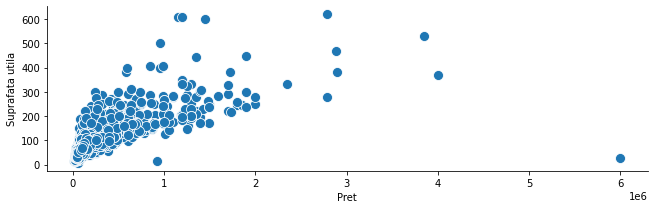

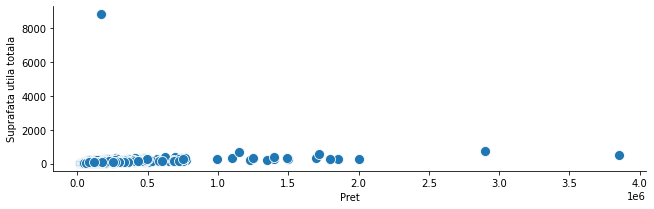

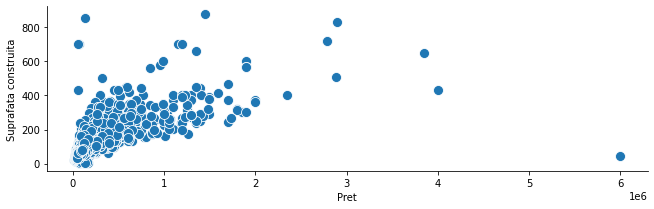

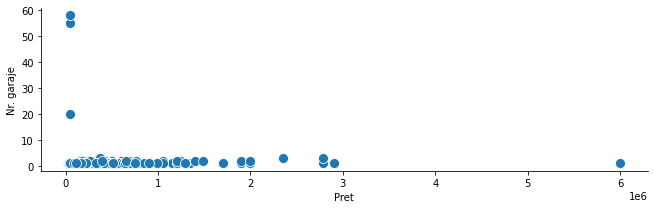

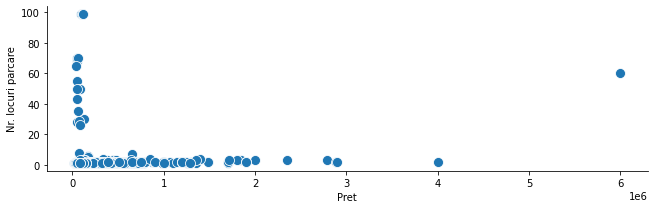

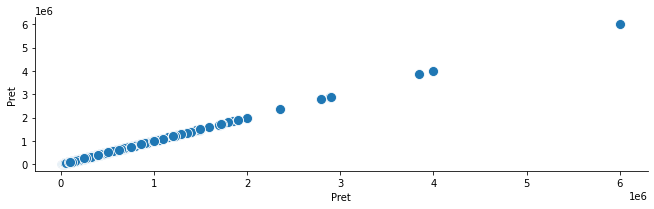

In [19]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']

for feature in numerical_features:
    for feature2 in numerical_features:
        sns.relplot(x=df_copy[feature], y=df_copy[feature2], data=df_copy, aspect=3, s=100, height=3)

As mentioned previously, the best way to check for the strength of relationships between features is by finding Pearson's correlation coeficient. It ranges from (-1, 1) with **-1 meaning there is negative correlation, 0 meaning there is no correlation, and 1 meaning positive correlation**. The best way to check for correlation is by using a **heatmap**. Seaborn offers the possiblity to do so.

Text(0.5, 1.0, 'Correlation Heatmap')

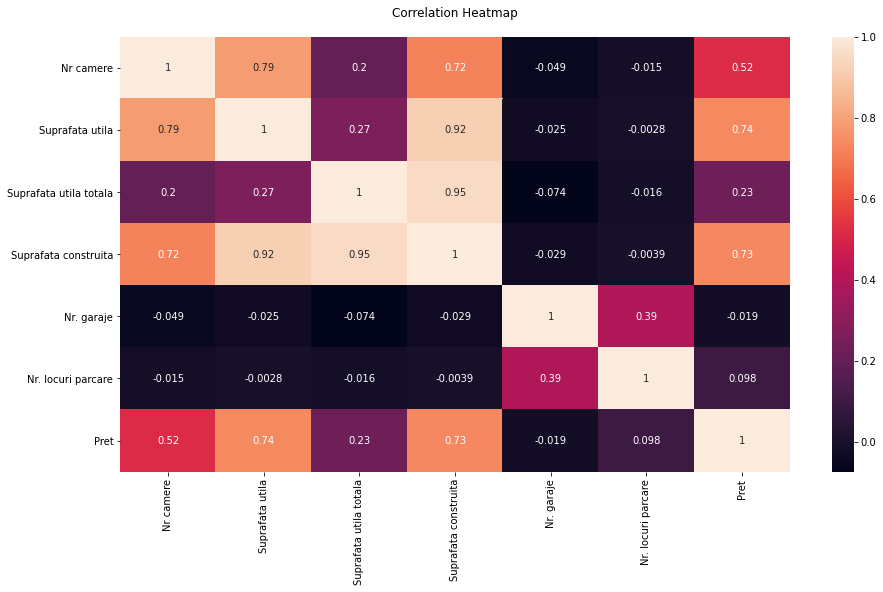

In [20]:
numerical_features = df_copy.select_dtypes('number')

plt.figure(figsize=(15, 8))
corr = numerical_features.corr()
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title('Correlation Heatmap', pad=20)

## 2. Categorical & Categorical

The best way to interpret the realationship between 2 categorical variables is by creating a **contingency table**. Pandas offers the possiblity to create such a table by using the **crosstab function**. We can clearly read the frequency distribution between all categorical 
features of the dataset.


In [21]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']

for feature in categorical_features:
    for feature2 in categorical_features:
        contingency_table = pd.crosstab(df_copy[feature], df_copy[feature2], margins=False)
        print(contingency_table)
        print('========'*15)

Compartimentare  circul  decomand  nedecomand  semidecomand  vag
Compartimentare                                                 
circul               69         0           0             0    0
decomand              0      7146           0             0    0
nedecomand            0         0          56             0    0
semidecomand          0         0           0          2439    0
vag                   0         0           0             0    1
Confort             1   2   3   lux
Compartimentare                    
circul             64   0   0     4
decomand         4937  60  12  2016
nedecomand         42   4   1     6
semidecomand     1777  74   4   530
vag                 1   0   0     0
Etaj             Demisol  Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   \
Compartimentare                                                          
circul                 0         0       0       15        0         1   
decomand               3        48      46     1452        2       142 

Finalizat/In constructie  Finalizat  In constructie
Compartimentare                                    
circul                           63               0
decomand                       5541            1328
nedecomand                       42               9
semidecomand                   2070             208
vag                               1               0
Inchise/Deschise  deschis  inchis
Compartimentare                  
circul                 48       9
decomand             4927     568
nedecomand             35       1
semidecomand         1421     244
vag                     1       0
Compartimentare  circul  decomand  nedecomand  semidecomand  vag
Confort                                                         
1                    64      4937          42          1777    1
2                     0        60           4            74    0
3                     0        12           1             4    0
lux                   4      2016           6           530    0
Confort 

Finalizat/In constructie  Finalizat  In constructie
Confort                                            
1                              5612             979
2                               118               2
3                                12               1
lux                            1977             557
Inchise/Deschise  deschis  inchis
Confort                          
1                    4606     686
2                      65      17
3                       3       2
lux                  1778     109
Compartimentare    circul  decomand  nedecomand  semidecomand  vag
Etaj                                                              
Demisol                 0         3           0             1    0
Demisol                 0        48           0            12    0
Etaj 1                  0        46           0            15    0
Etaj 1                 15      1452           9           396    0
Etaj 10                 0         2           0             3    0
Etaj 10        

Zona               1 Decembrie 1918  1 Mai  13 Septembrie  16 Februarie  \
Etaj                                                                      
Demisol                           0      0              0             0   
Demisol                           2      0              0             0   
Etaj 1                            2      0              0             0   
Etaj 1                           34      7             18             0   
Etaj 10                           0      0              0             0   
Etaj 10                           0      1              1             0   
Etaj 11                           0      0              0             0   
Etaj 11                           0      2              0             0   
Etaj 12                           0      0              0             0   
Etaj 13                           0      0              0             0   
Etaj 14                           0      0              0             0   
Etaj 15                  

Zona           1 Decembrie 1918  1 Mai  13 Septembrie  16 Februarie  \
Nr. bucatarii                                                         
1.00000                     164     66            107             2   
2.00000                       0      0              2             0   
3.00000                       0      0              0             0   
12.00000                      0      0              0             0   

Zona           Alba Iulia  Alexandriei  Alexandru Obregia  Amzei  Andronache  \
Nr. bucatarii                                                                  
1.00000                 4           10                 18      1           1   
2.00000                 0            0                  0      0           0   
3.00000                 0            0                  0      0           0   
12.00000                0            0                  0      0           0   

Zona           Antiaeriană  Aparatorii Patriei  Apusului  Apărătorii Patriei  \
Nr. bucatari

Zona      1 Decembrie 1918  1 Mai  13 Septembrie  16 Februarie  Alba Iulia  \
Nr. bai                                                                      
1.00000                133     49             61             2           0   
2.00000                 38     16             55             0           4   
3.00000                  2      5              2             0           0   
4.00000                  0      1              0             0           0   
5.00000                  0      0              0             0           0   
6.00000                  0      0              0             0           0   
11.00000                 0      0              0             0           0   

Zona      Alexandriei  Alexandru Obregia  Amzei  Andronache  Antiaeriană  \
Nr. bai                                                                    
1.00000             8                 15      1           0            5   
2.00000             3                  7      0           0          

Regim inaltime  D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  D+P+17E  \
An constructie                                                                
1880              0        0          0        0        0        0        0   
1890              0        0          0        0        0        0        0   
1891              0        0          0        0        0        0        0   
1903              0        0          0        0        0        0        0   
1910              0        0          0        0        0        0        0   
1912              0        0          0        0        0        0        0   
1915              0        0          0        0        0        0        0   
1920              0        0          0        0        0        0        0   
1922              0        0          0        0        0        0        0   
1924              0        0          0        0        0        0        0   
1925              0        0          0        0    

metal                                0                  0  
Nr. bucatarii         1.00000   2.00000   3.00000   12.00000
Structura rezistenta                                        
altele                     633         4         0         0
bca                          3         0         0         0
beton                     5796        24         2         0
caramida                   540         4         0         1
metal                        2         0         0         0
Nr. bai               1.00000  2.00000  3.00000  4.00000  5.00000  6.00000
Structura rezistenta                                                      
altele                    393      210       28        8        2        0
bca                         2        1        1        0        0        0
beton                    3941     1793      293       60        9        1
caramida                  493      158       14        0        1        0
lemn                        2        0        0        0       

Compartimentare      circul  decomand  nedecomand  semidecomand  vag
Tip imobil                                                          
bloc de apartamente      60      7017          52          2365    1
casa/vila                 9       103           4            63    0
Confort                 1    2   3   lux
Tip imobil                              
bloc de apartamente  6761  135  17  2566
casa/vila             123    4   1    45
Etaj                 Demisol  Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   \
Tip imobil                                                                   
bloc de apartamente        2        57      60     1841        7       207   
casa/vila                  0         5       3       58        0         0   

Etaj                 Etaj 11  Etaj 11   Etaj 12   Etaj 13   Etaj 14   \
Tip imobil                                                             
bloc de apartamente        5        83        20         6         7   
casa/vila                  0   

Finalizat/In constructie  Finalizat  In constructie
Tip imobil                                         
bloc de apartamente            7733            1574
casa/vila                       164               2
Inchise/Deschise     deschis  inchis
Tip imobil                          
bloc de apartamente     6502     821
casa/vila                 70       4
Compartimentare  circul  decomand  nedecomand  semidecomand  vag
Regim inaltime                                                  
D+P                   0         7           0             4    0
D+P+10E               0        20           0             5    0
D+P+10E+M             0         1           0             0    0
D+P+11E               0        22           0             7    0
D+P+12E               0         5           0             0    0
D+P+13E               0         1           0             0    0
D+P+17E               0         1           0             0    0
D+P+1E                0        12           0             5

Regim inaltime  D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  D+P+17E  \
Regim inaltime                                                                
D+P              11        0          0        0        0        0        0   
D+P+10E           0       26          0        0        0        0        0   
D+P+10E+M         0        0          1        0        0        0        0   
D+P+11E           0        0          0       29        0        0        0   
D+P+12E           0        0          0        0        5        0        0   
D+P+13E           0        0          0        0        0        1        0   
D+P+17E           0        0          0        0        0        0        1   
D+P+1E            0        0          0        0        0        0        0   
D+P+1E+M          0        0          0        0        0        0        0   
D+P+2E            0        0          0        0        0        0        0   
D+P+2E+M          0        0          0        0    

Etaj          Demisol  Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   Etaj 11  \
Nr. balcoane                                                                   
1                   0        12      28     1154        2       109        3   
1                   0         0       2      125        1        20        0   
12                  0         0       0        0        0         0        0   
14                  0         0       0        1        0         0        0   
2                   0         2       8      200        1        25        0   
2                   0         0       0       22        0         0        0   
3                   0         1       0       31        0         8        0   
3                   0         0       0        2        0         0        0   
4                   0         0       0        3        0         3        0   
4                   0         0       0        0        0         0        0   
5                   0         0       0 

Inchise/Deschise  deschis  inchis
Nr. balcoane                     
1                    5280       0
1                       4     712
12                      1       0
14                      1       0
2                     983       0
2                      43      98
3                     186       0
3                      15      11
4                      46       0
4                       3       4
5                       9       0
6                       1       0
Compartimentare        circul  decomand  nedecomand  semidecomand  vag
Zona                                                                  
1 Decembrie 1918            0       162           0            16    0
1 Mai                       0        44           0            29    0
13 Septembrie               0        95           1            30    0
16 Februarie                0         1           0             1    0
Alba Iulia                  0         2           0             2    0
Alexandriei                

Structura rezistenta   altele  bca  beton  caramida  lemn  metal
Zona                                                            
1 Decembrie 1918            0    0    141        12     0      0
1 Mai                       8    0     48         1     0      0
13 Septembrie              11    0     77         4     0      0
16 Februarie                0    0      1         0     0      0
Alba Iulia                  0    0      3         0     0      0
Alexandriei                 0    0      7         3     0      0
Alexandru Obregia           6    0      9         0     0      0
Antiaeriană                 0    0      2         3     0      0
Aparatorii Patriei          0    0      4         0     0      0
Apusului                    1    0      3         1     0      0
Apărătorii Patriei         11    0    118         7     0      0
Arcul de Triumf             3    0     12         1     0      0
Armeneasca                  1    0     13         2     0      0
Aviatiei                 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Another way to check for categorical relationships between variables is by using a **non-parametric test**. The test is called **Chi-Square Test**. The Chi-Square Test determines whether there is an association between 2 categorical variables. Here, it is used to find the **statistical significance** of the variables and is based on the difference between the expected and the observed frequencies of the categories of the table, provided there are no relationships. It returns the computed statistic, probablity **(p-value)**, the degrees of freedom, and a table of expected frequencies. Let us dive a bit into p-values. A p-value is the probability of getting an unusual result or a more unusual result if the **null hypothesis** is true. A Null hypothesis is something we believe to be true while we evaluate the outcome of our experiment.


- P-value of 0: It indicates that both categorical variables are dependent

- P-value of 1: It shows that both variables are independent.

- P-value less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.


In our case, the null hypothesis will state that the 2 categorical features are independent of each other and there is no relationship between them whatsoever. Rejecting the null hypothesis will in turn allow the **alternate hypothesis** (our desired hypothesis) to be taken into account.

In [22]:
def chi_square_func(cont_table):
    chi2, p_value, dof, exp = stats.chi2_contingency(cont_table)
    print('The statistic is: {}'.format(chi2))
    print('The p-value is: {}'.format(p_value))
    
    if p_value < .05:
        print('We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them')
    else:
        print('We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them')
    print('========'*15)
    

for feature in categorical_features:
    for feature2 in categorical_features:
        first_feature_name = feature
        second_feature_name = feature2
        contingency_table = pd.crosstab(df_copy[feature], df_copy[feature2], margins=True)
        print('{0} vs {1}'.format(first_feature_name, second_feature_name))
        chi_square_func(contingency_table)

Compartimentare vs Compartimentare
The statistic is: 38844.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Confort
The statistic is: 139.74052821323266
The p-value is: 5.668514827113084e-20
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Etaj
The statistic is: 233.76051983870022
The p-value is: 0.01674694025992813
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Nr. bucatarii
The statistic is: 18.012183848608693
The p-value is: 0.5866055994977649
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Compartimentare vs Nr. bai
The statistic is: 27.91355757726578
The p-value is: 0.796961158591412
We fail to 

Etaj vs An constructie
The statistic is: 6914.069301462979
The p-value is: 8.837706700319418e-128
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Etaj vs Structura rezistenta
The statistic is: 199.2171947994242
The p-value is: 0.7872986953899478
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Etaj vs Tip imobil
The statistic is: 279.464817094591
The p-value is: 1.794916261134551e-24
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Etaj vs Regim inaltime
The statistic is: 53870.36845824611
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Etaj vs Nr. balcoane
The statistic is: 1616.0687679685154
The p-value is: 7.104279688194178e-116
We are rejecting the null h

Nr. bai vs An constructie
The statistic is: 2386.7555310220337
The p-value is: 2.1770658126041905e-166
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Nr. bai vs Structura rezistenta
The statistic is: 43.57886143552695
The p-value is: 0.18019946308590645
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Nr. bai vs Tip imobil
The statistic is: 24.47228067215137
The p-value is: 0.040148907369242655
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Nr. bai vs Regim inaltime
The statistic is: 1829.5067833775943
The p-value is: 2.961786631420961e-89
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Nr. bai vs Nr. balcoane
The statistic is: 1714.2055932747792
The p-value is: 3.28221367690

Structura rezistenta vs Nr. bai
The statistic is: 43.578861435526946
The p-value is: 0.18019946308590654
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Structura rezistenta vs An constructie
The statistic is: 1361.5734793586796
The p-value is: 5.896664539510668e-59
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Structura rezistenta
The statistic is: 37170.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Tip imobil
The statistic is: 296.72311031918883
The p-value is: 2.2887872774993695e-56
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Regim inaltime
The statistic is: 2424.4128693095

The statistic is: 1829.5067833775945
The p-value is: 2.961786631420287e-89
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs An constructie
The statistic is: 35300.66415471669
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs Structura rezistenta
The statistic is: 2424.4128693095818
The p-value is: 1.1475339186680615e-211
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs Tip imobil
The statistic is: 3234.645427782212
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs Regim inaltime
The statistic is: 1052568.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that 

The statistic is: 3308.0894558294076
The p-value is: 1.0137815632856651e-129
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs An constructie
The statistic is: 67035.10469348234
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs Structura rezistenta
The statistic is: 2718.9016113509056
The p-value is: 5.840278516802899e-110
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs Tip imobil
The statistic is: 1048.2088281456654
The p-value is: 8.117356218495532e-51
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs Regim inaltime
The statistic is: 46715.32914219337
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variab

Inchise/Deschise vs An constructie
The statistic is: 797.2823921264405
The p-value is: 4.8217182474122136e-71
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Structura rezistenta
The statistic is: 85.97049122732722
The p-value is: 2.9610429633154656e-13
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Tip imobil
The statistic is: 2.4920457726552074
The p-value is: 0.6460606848295829
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Inchise/Deschise vs Regim inaltime
The statistic is: 950.0185286555312
The p-value is: 3.2259336292486835e-97
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Nr. balcoane
The statistic is: 697

## 3. Categorical & Numerical

To interpret the relationship between the categorical and numerical features of the dataset we shall use **bar plots**. The x-axis and y-axis will be comprised of categorical variables, and numerical variables respectively. The black small bars coming out of the bigger bars are called **error bars** and they show the error or uncertainty in the reported measurement of each category.

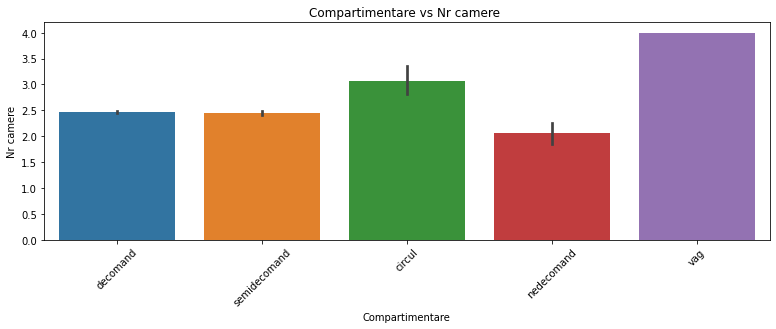

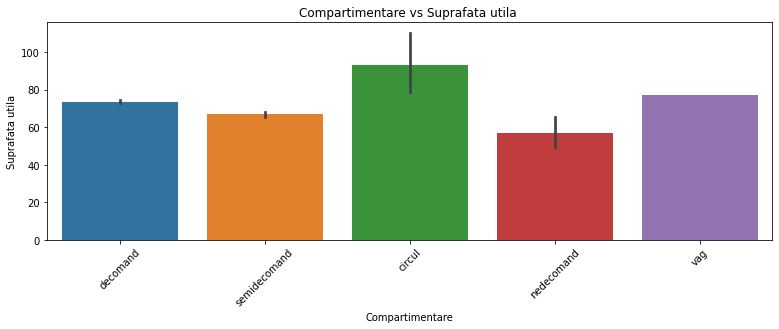

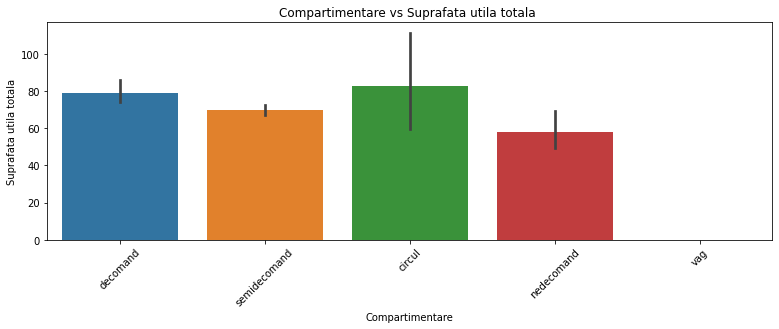

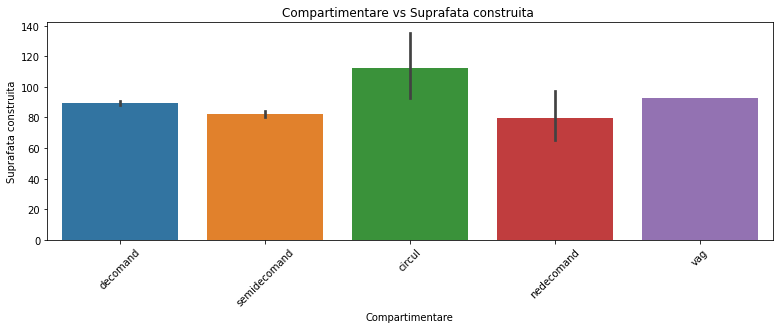

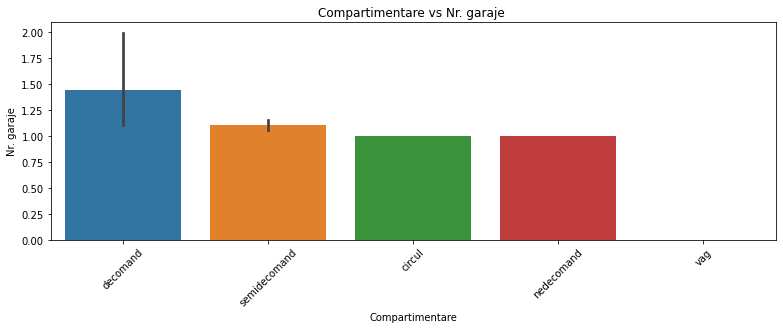

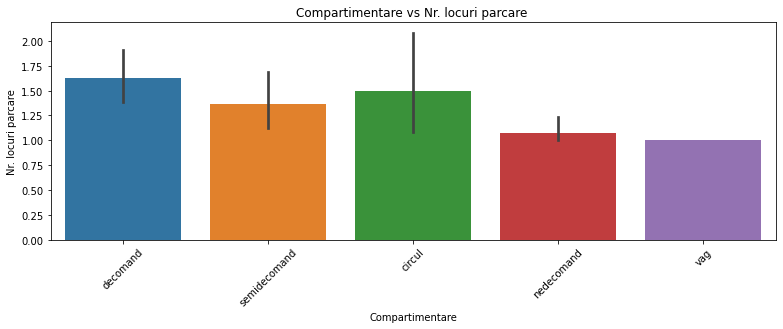

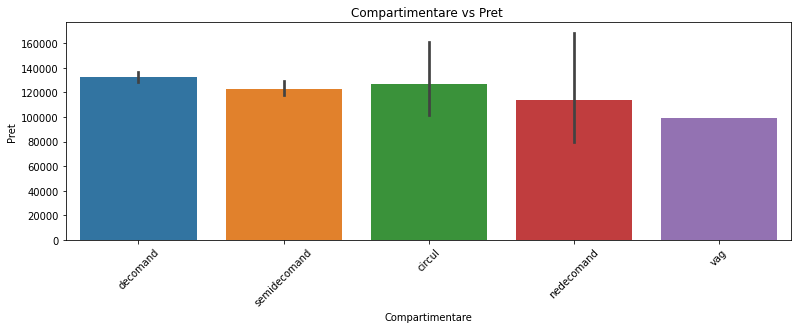

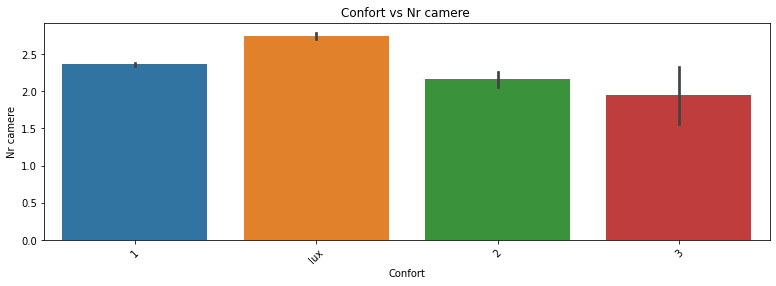

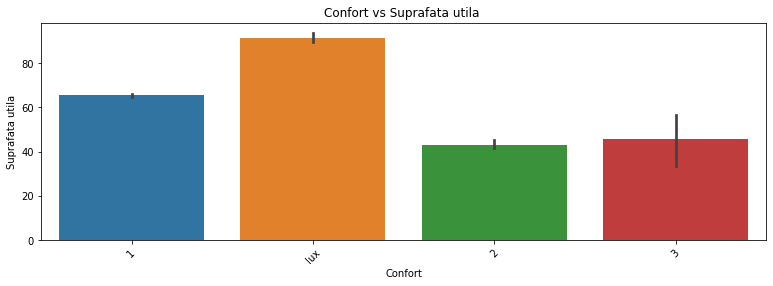

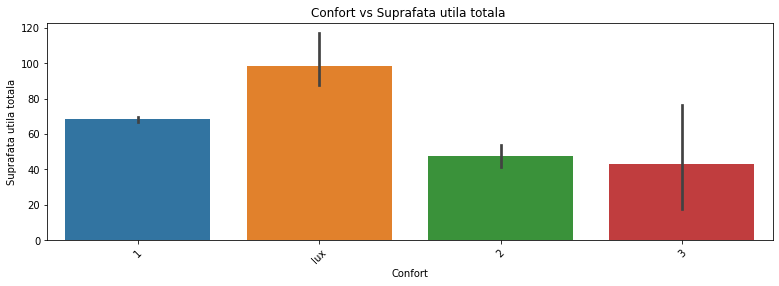

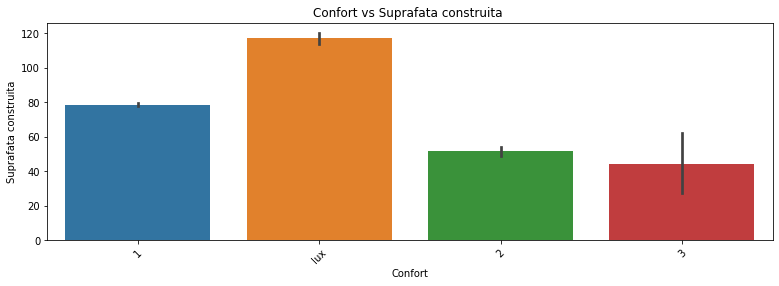

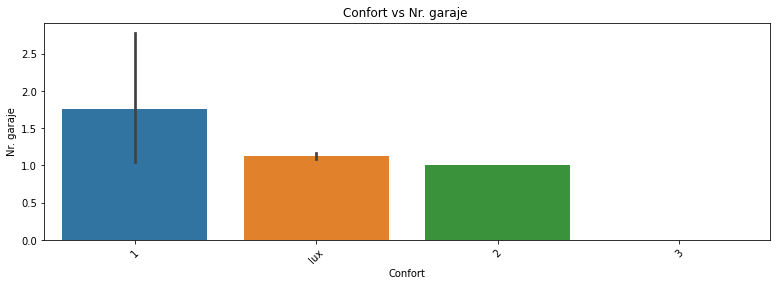

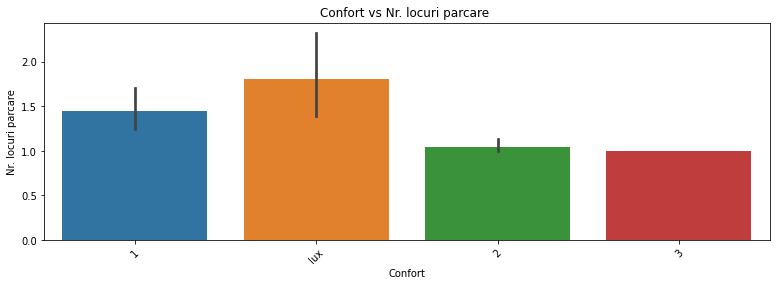

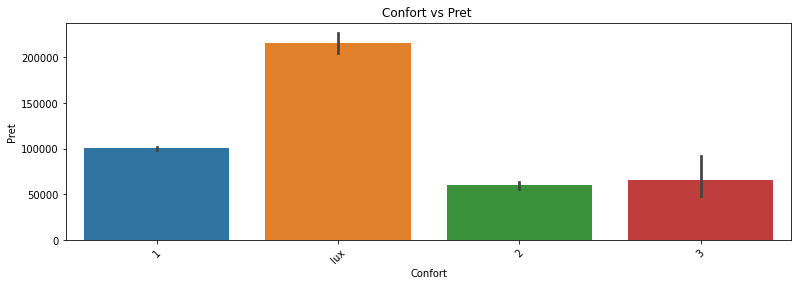

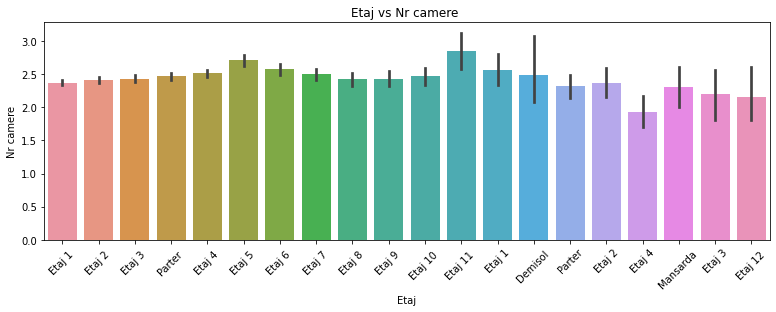

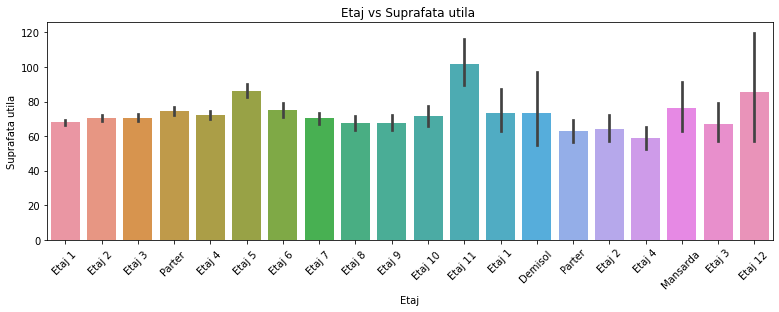

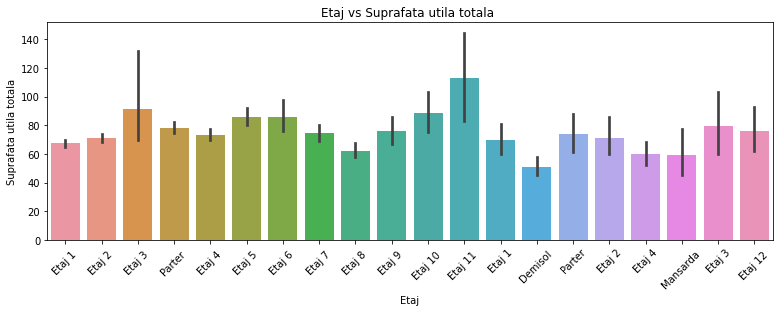

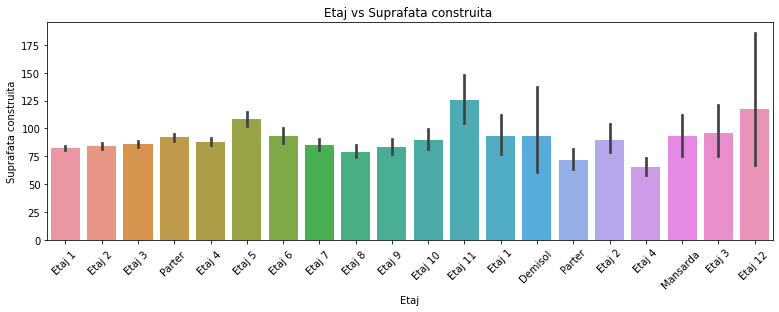

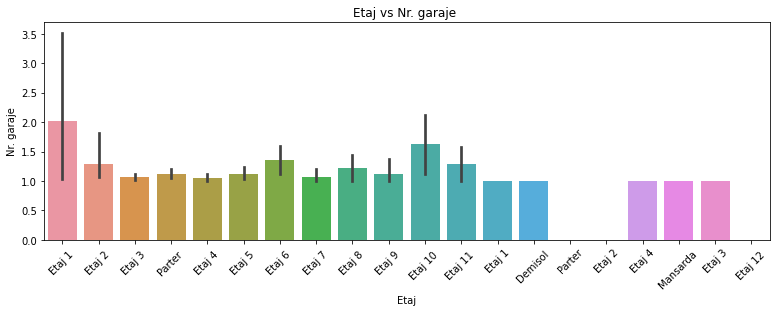

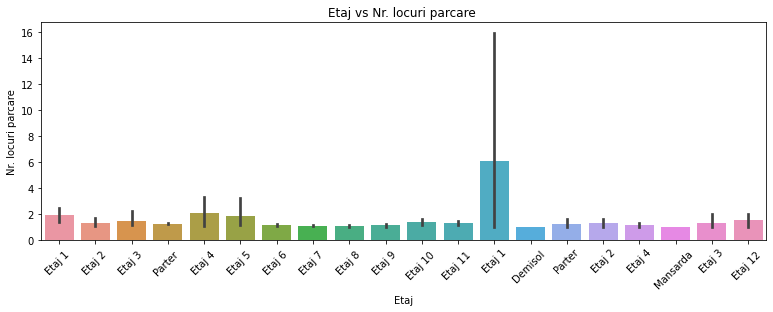

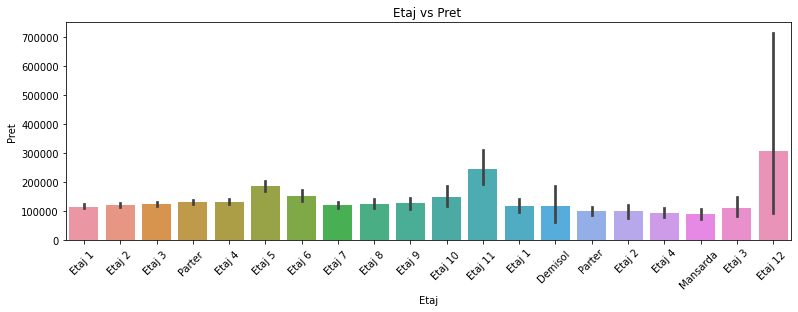

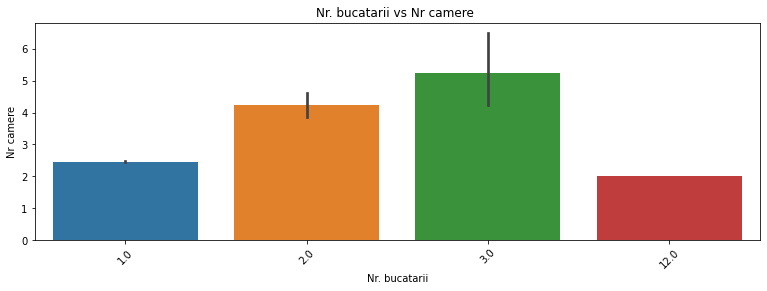

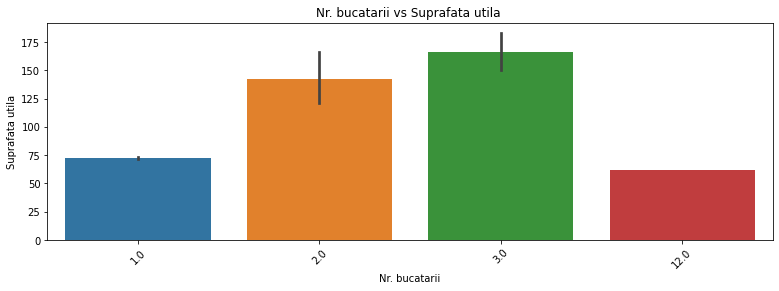

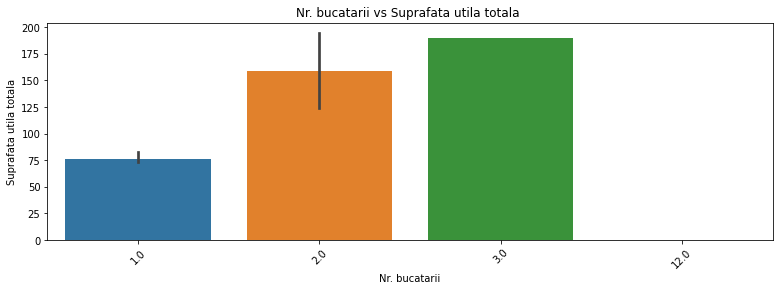

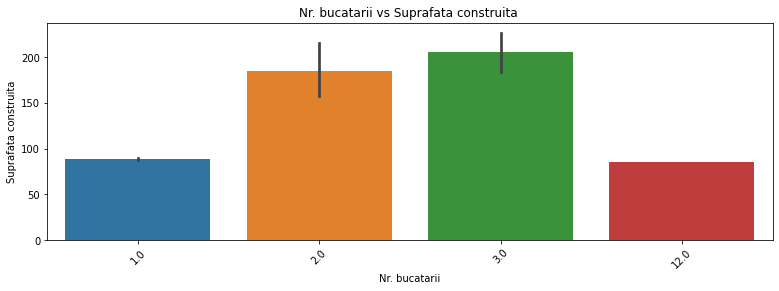

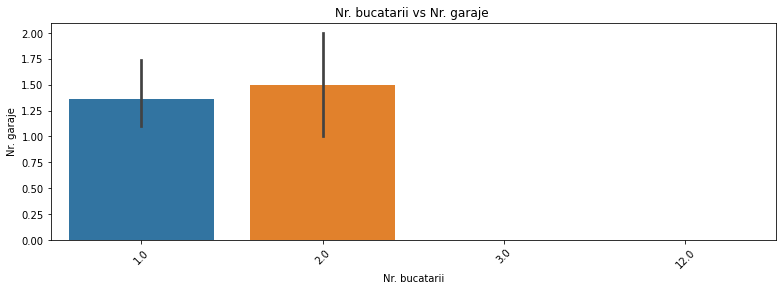

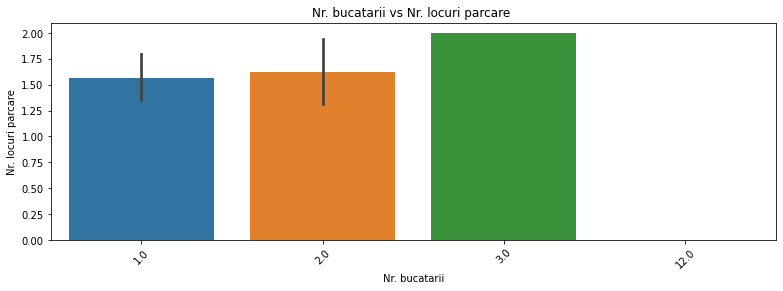

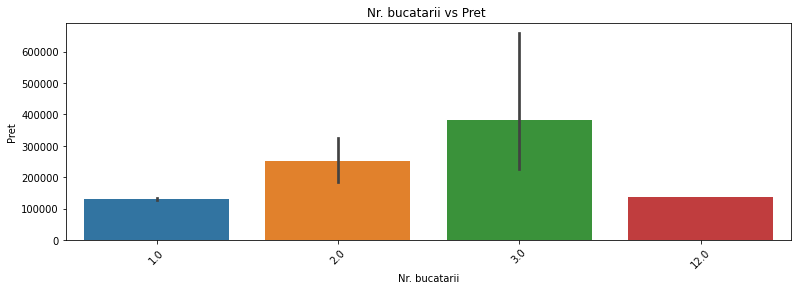

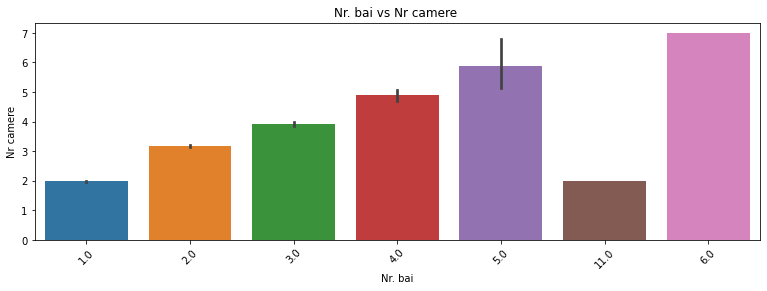

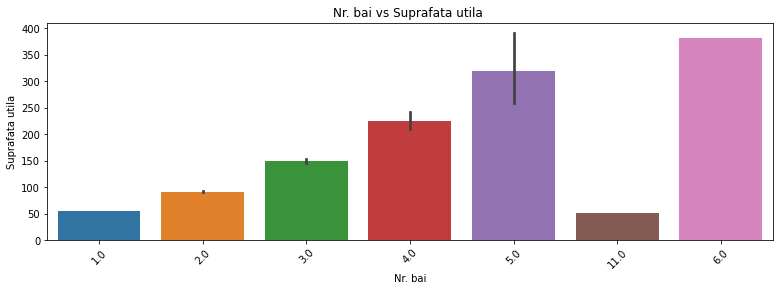

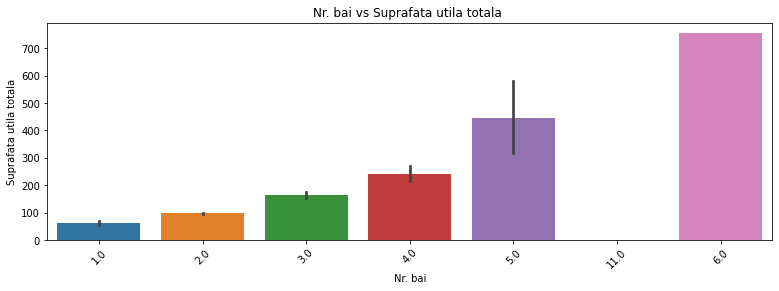

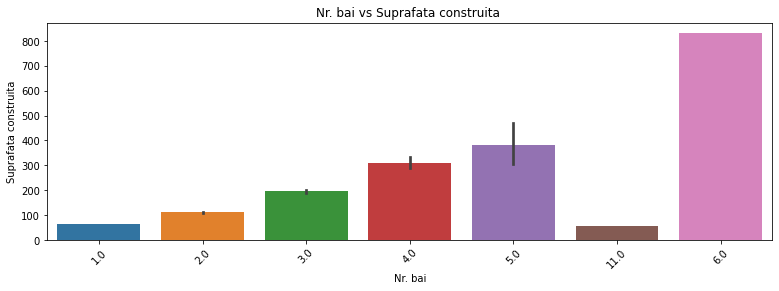

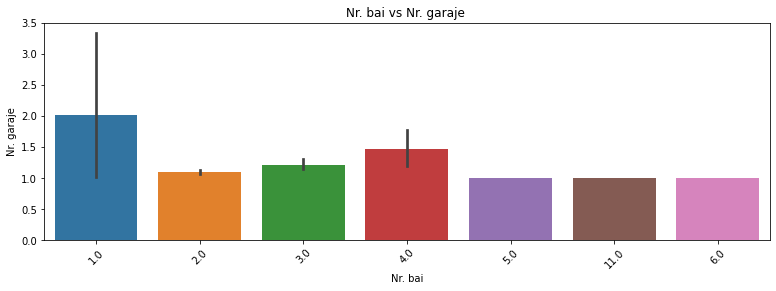

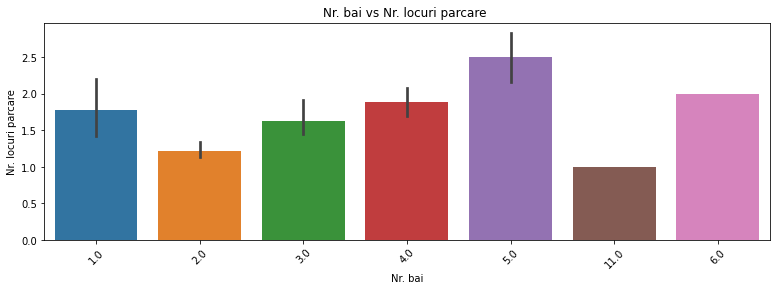

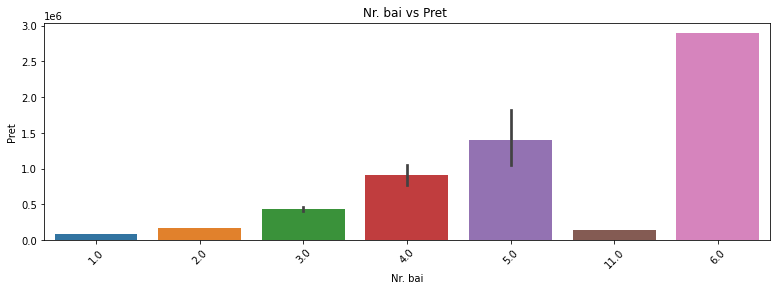

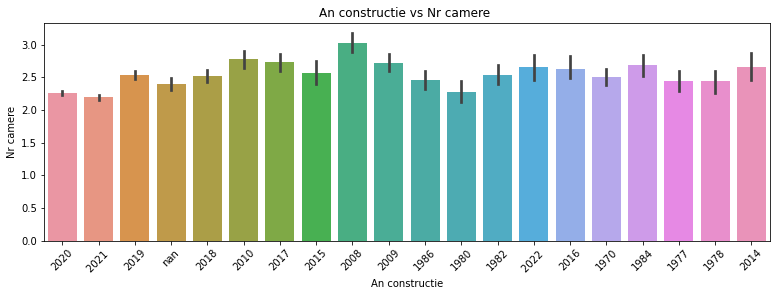

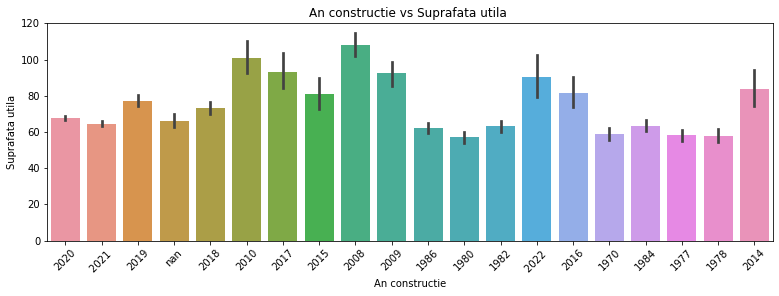

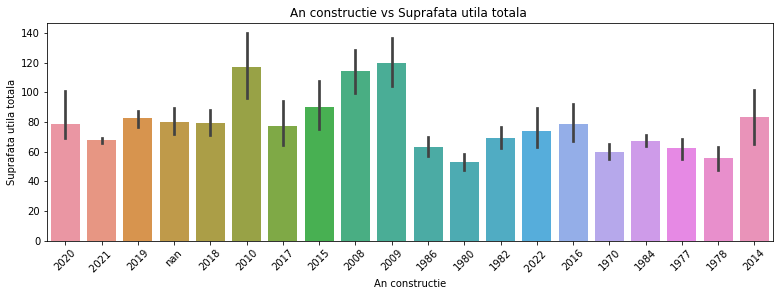

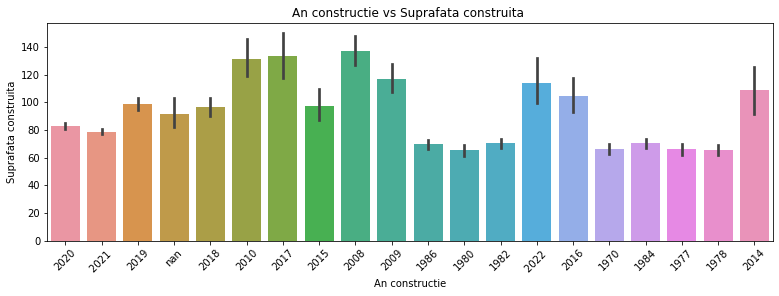

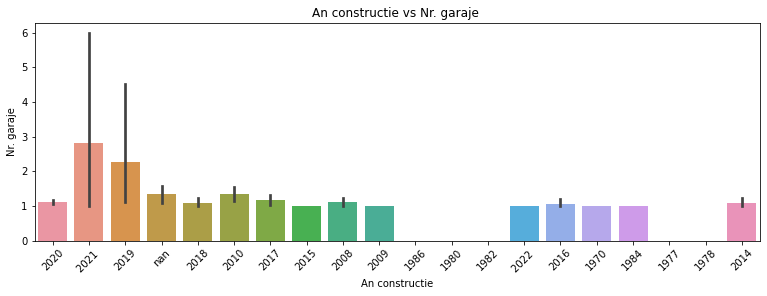

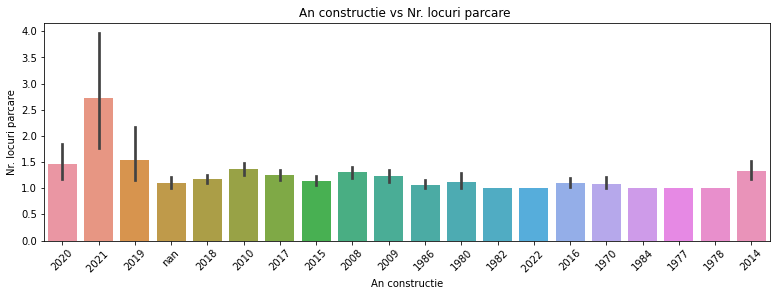

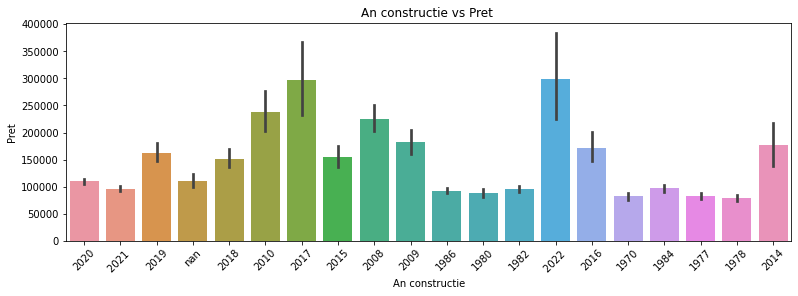

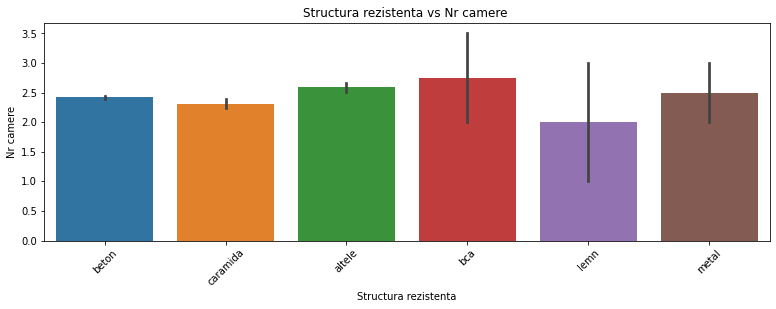

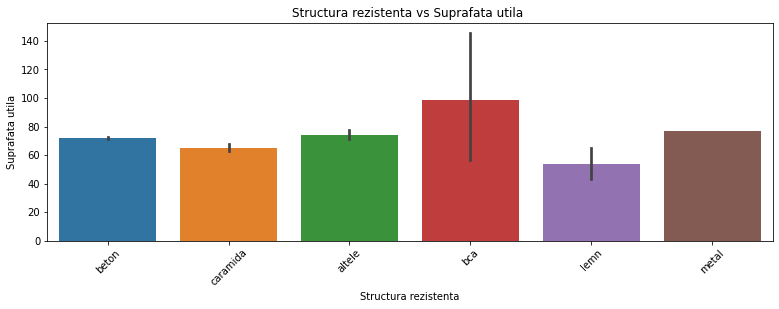

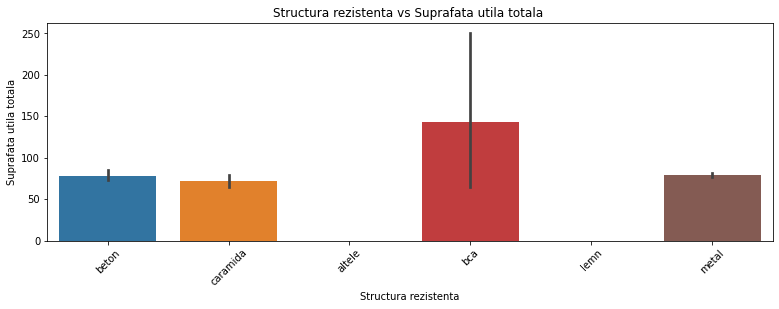

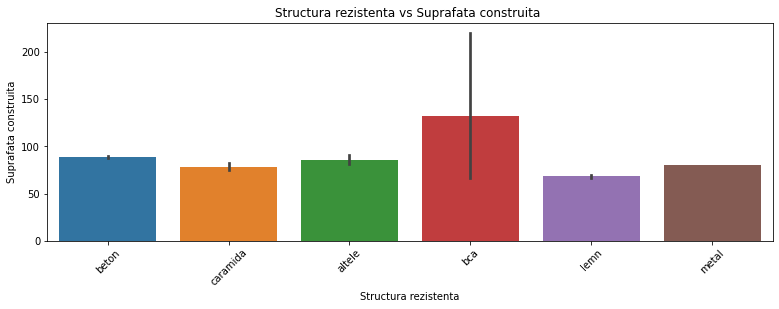

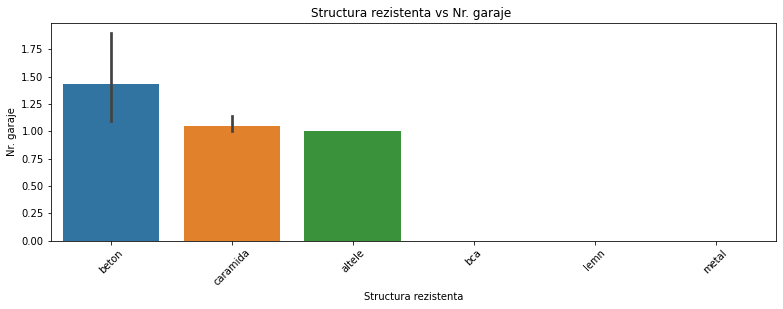

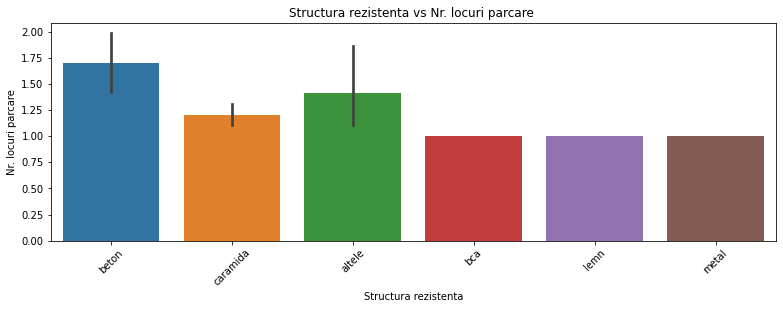

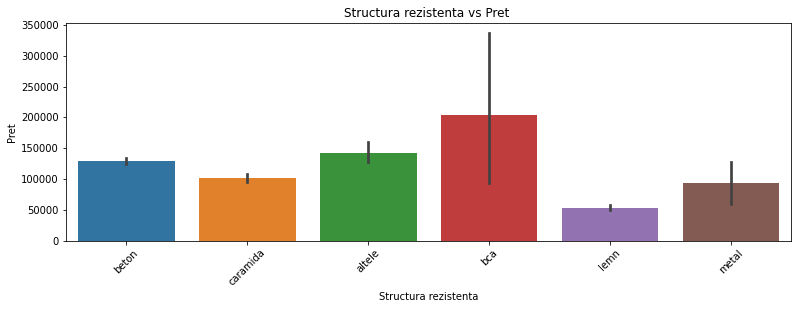

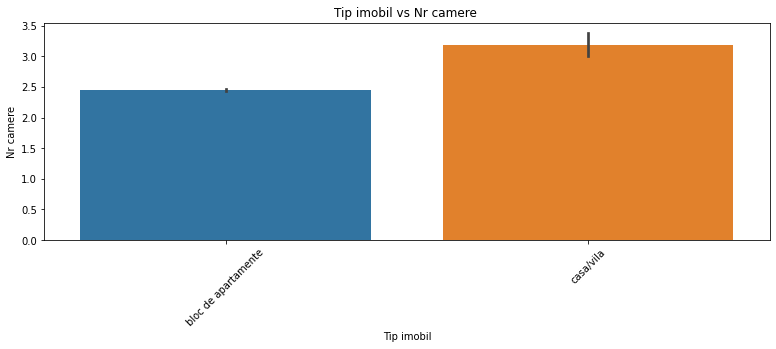

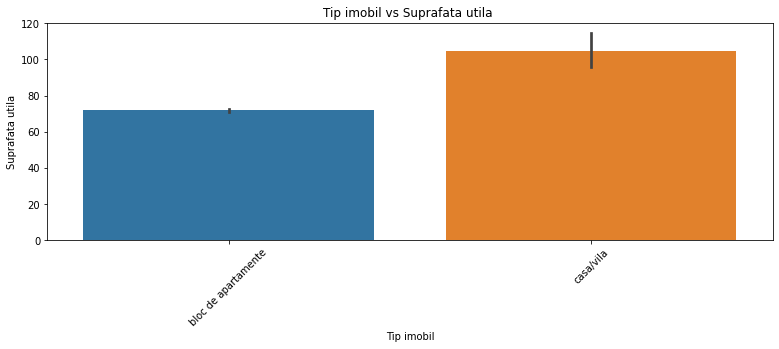

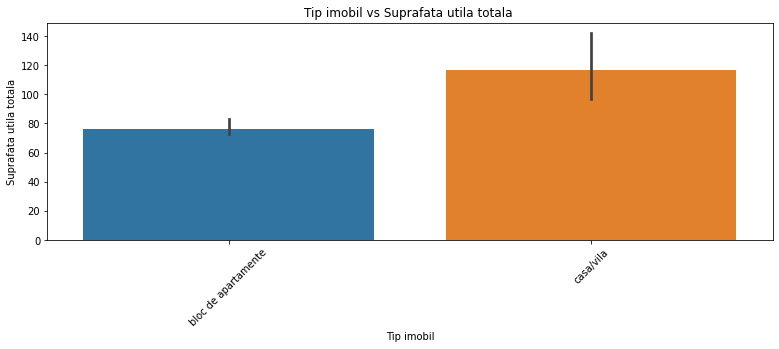

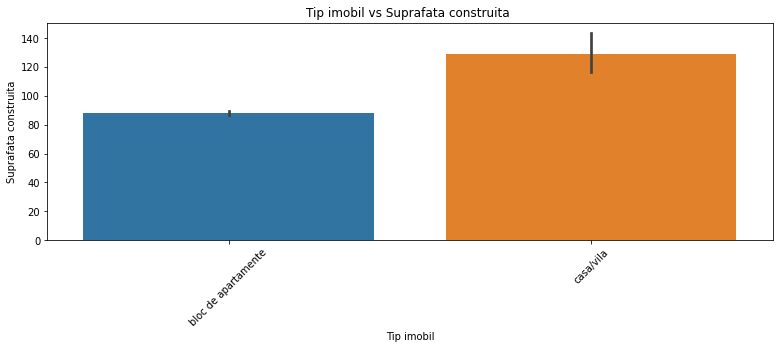

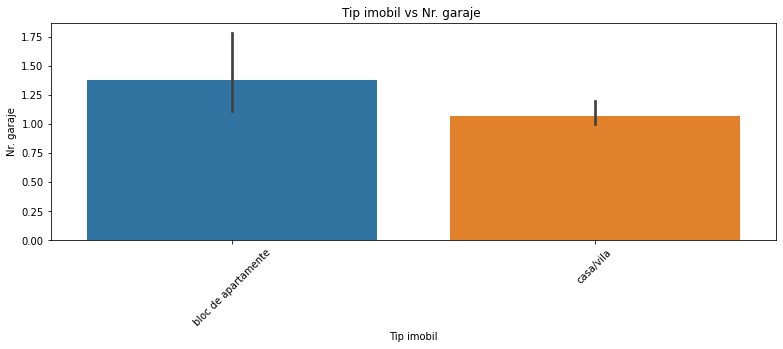

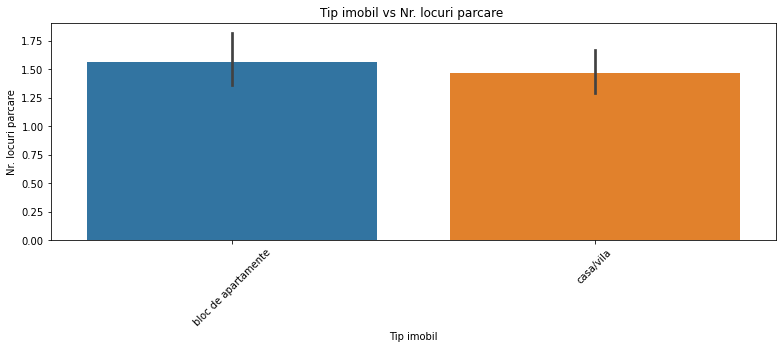

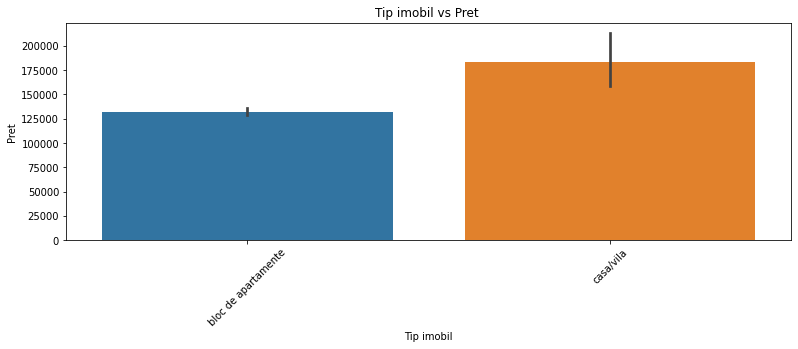

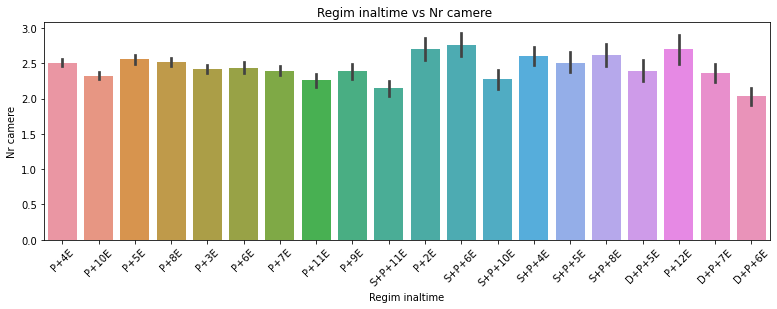

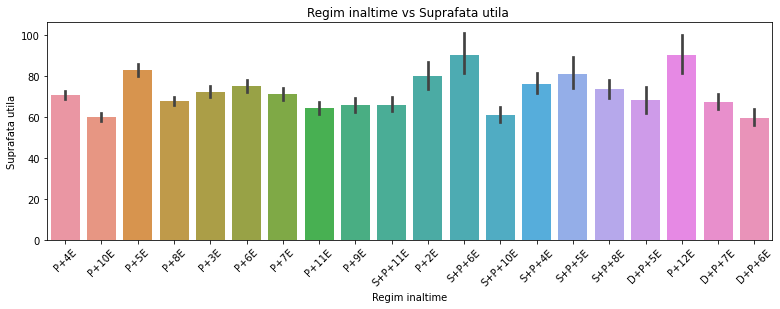

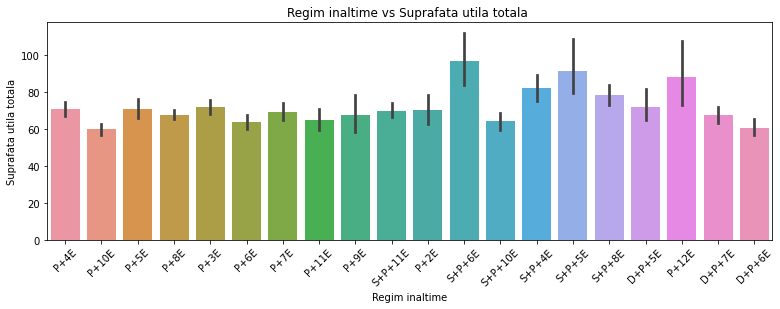

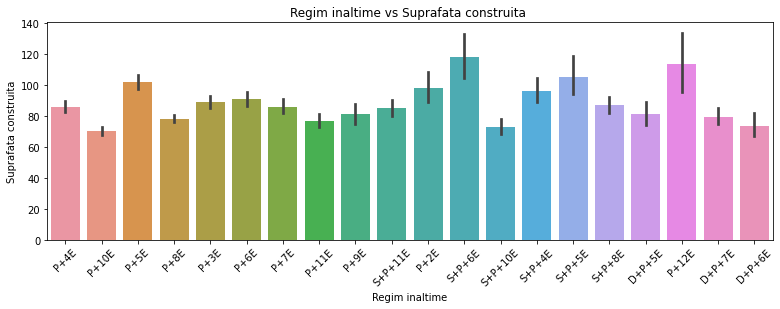

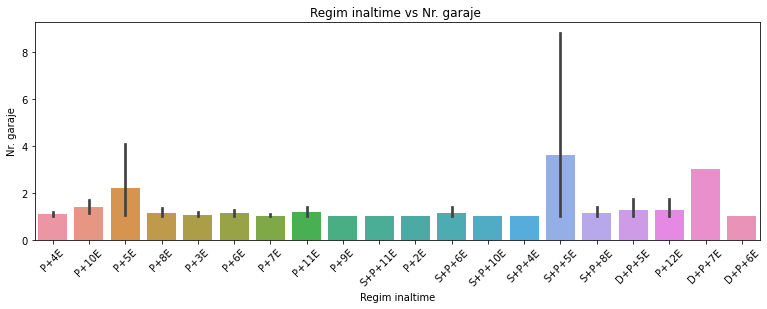

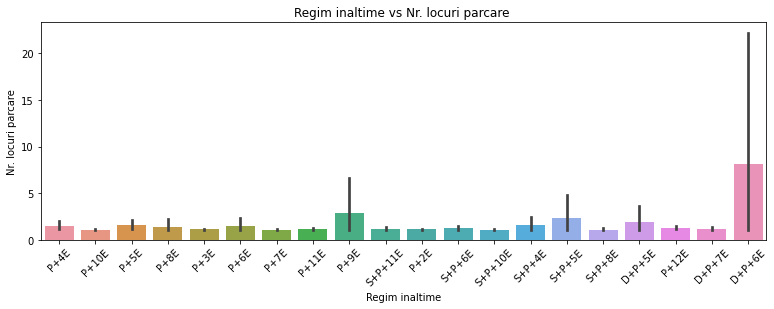

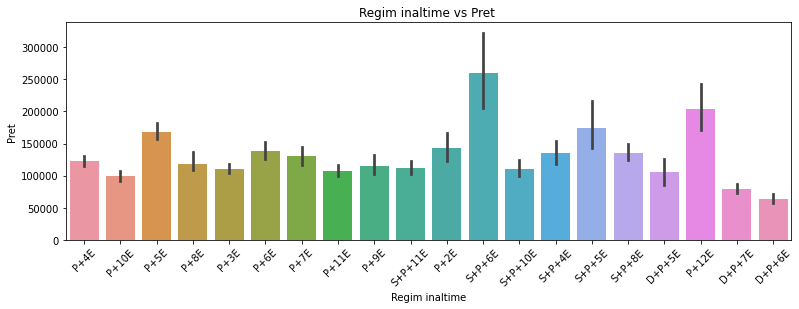

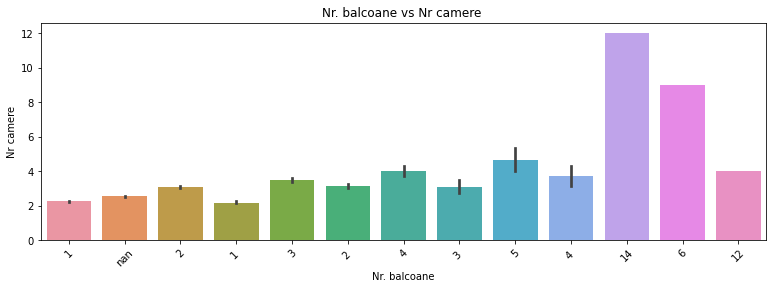

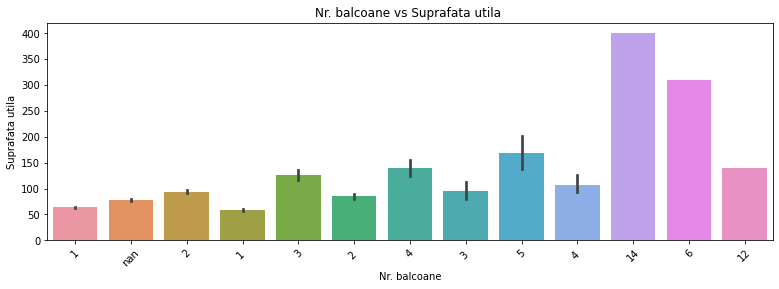

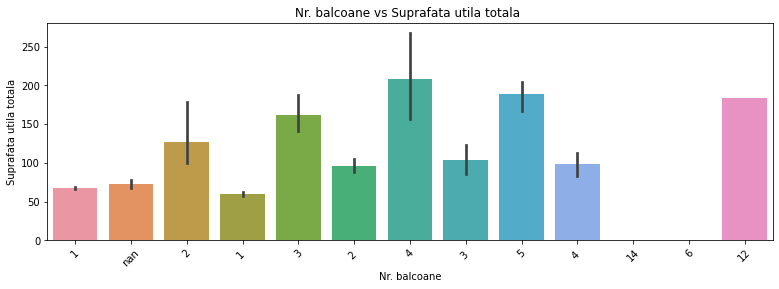

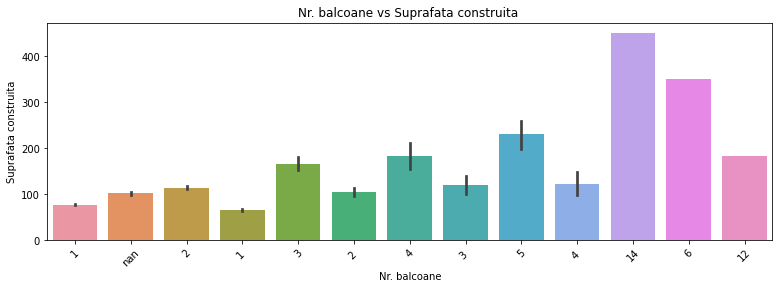

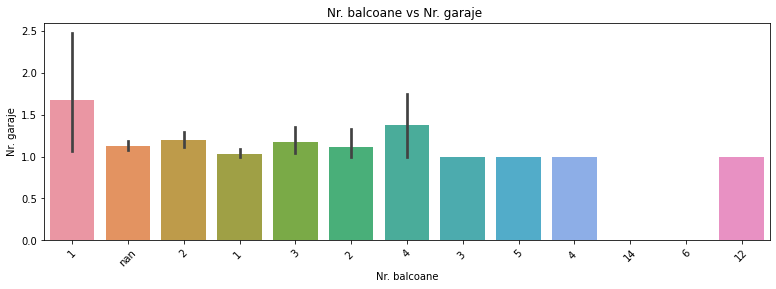

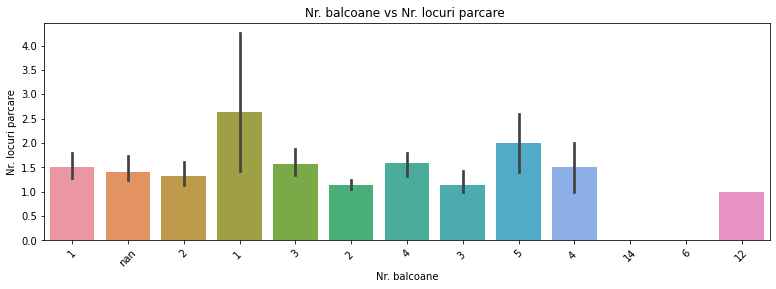

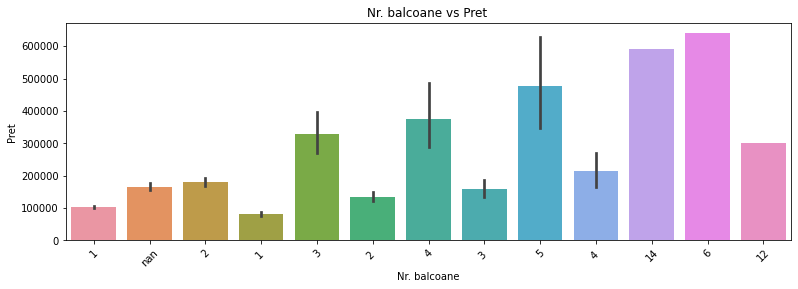

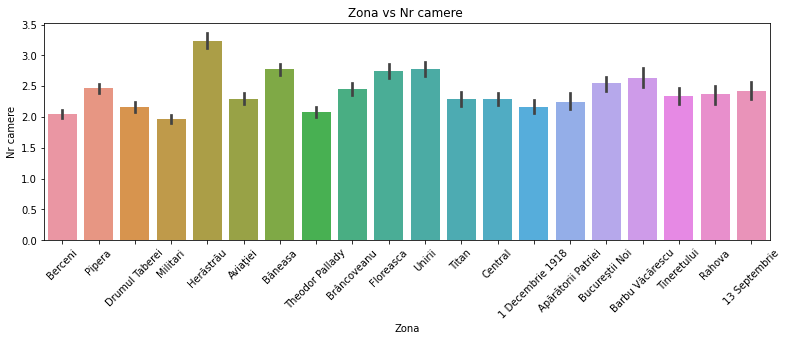

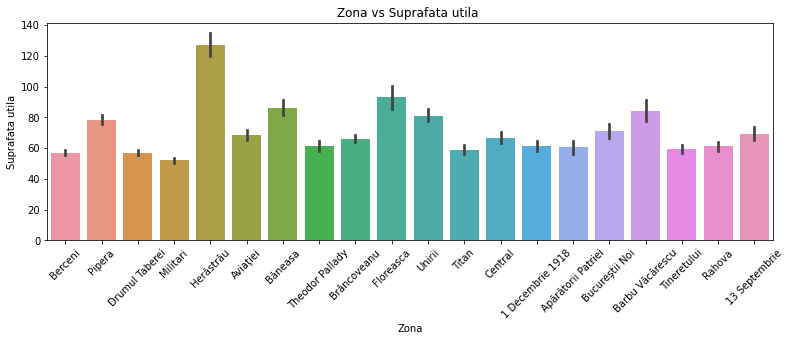

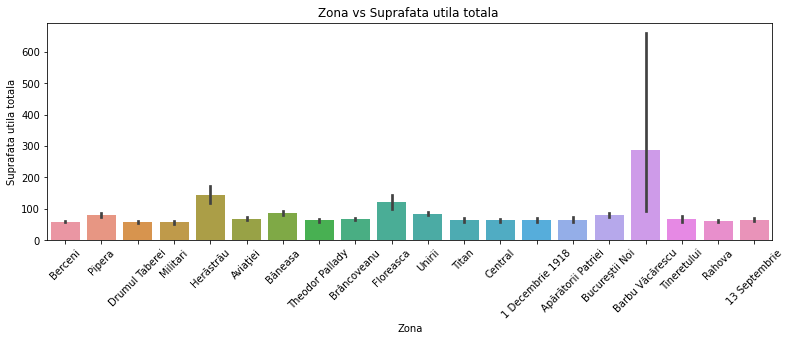

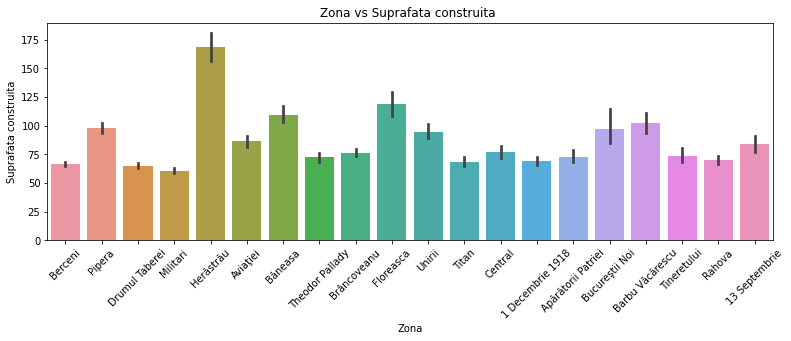

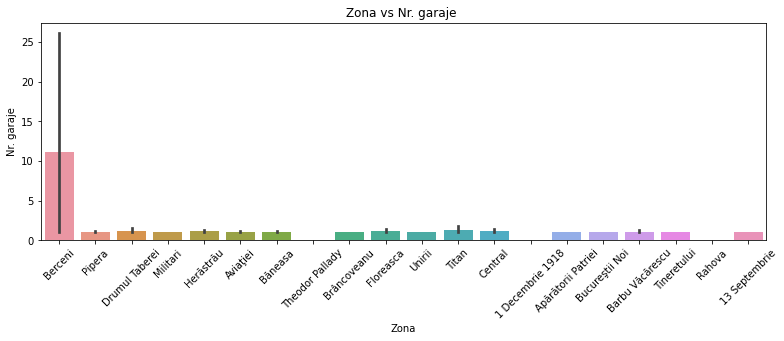

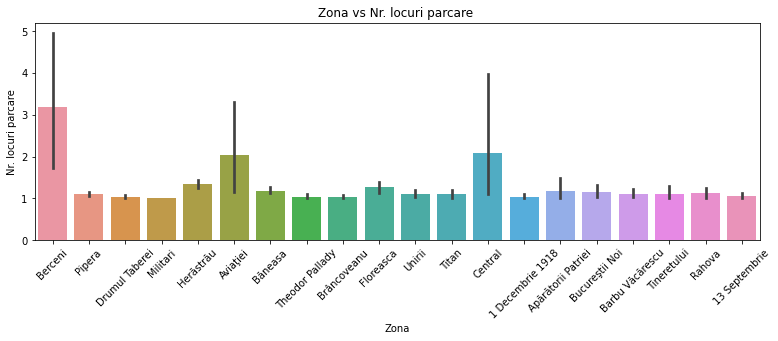

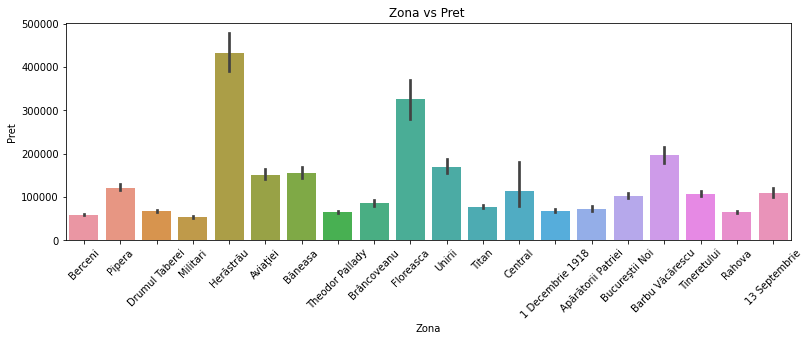

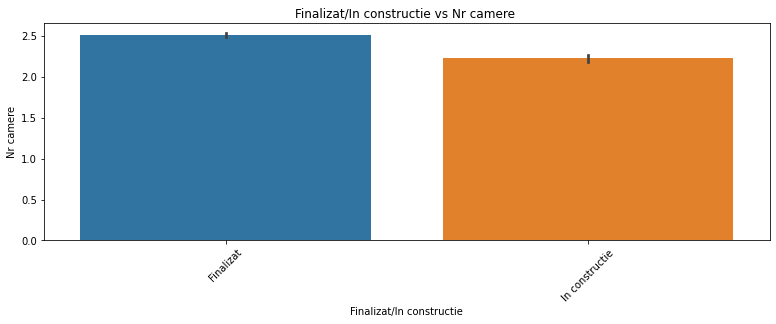

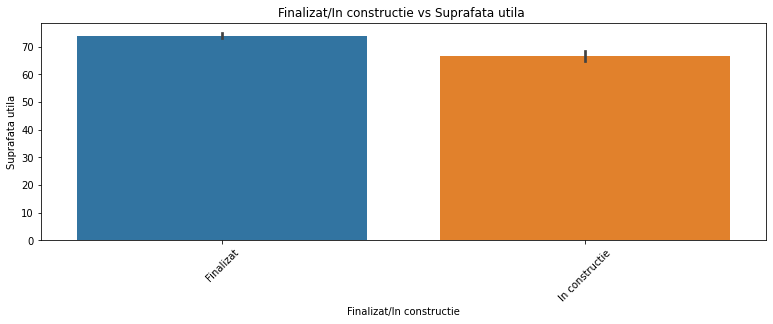

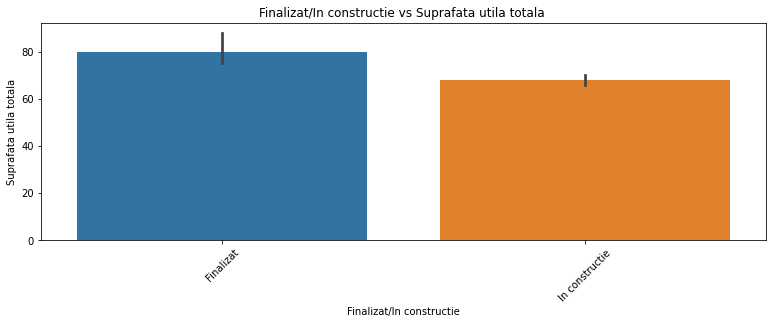

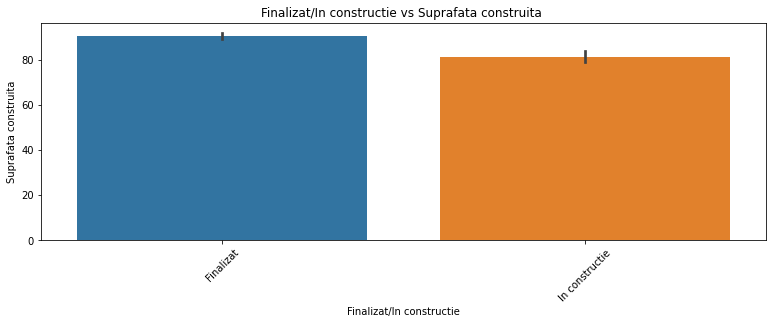

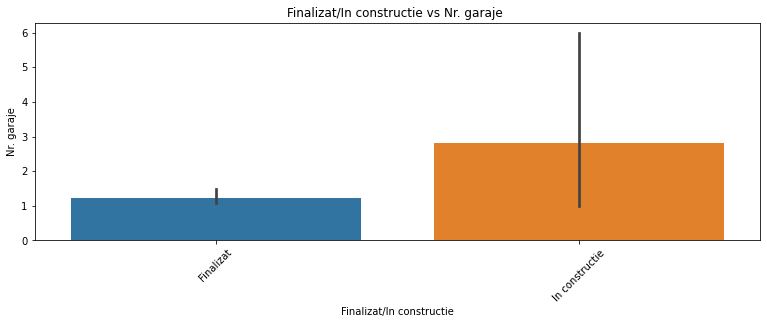

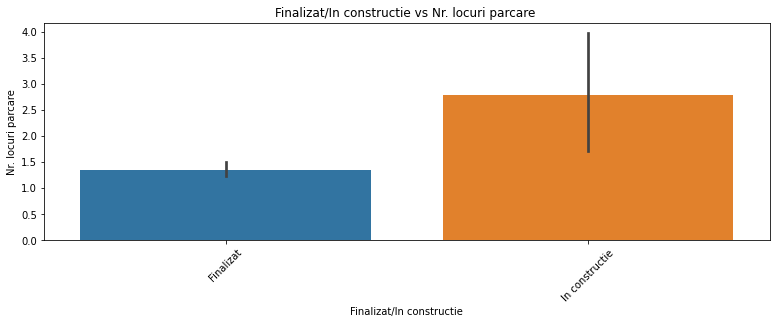

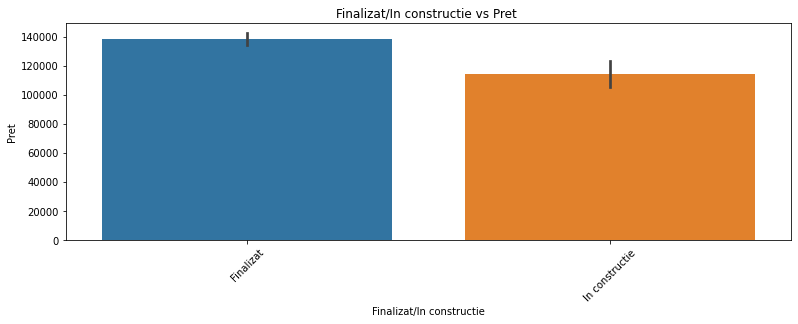

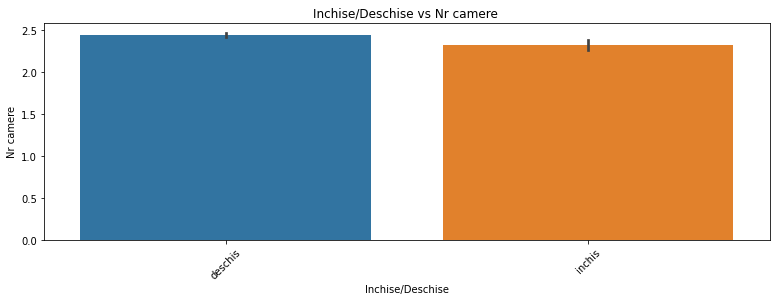

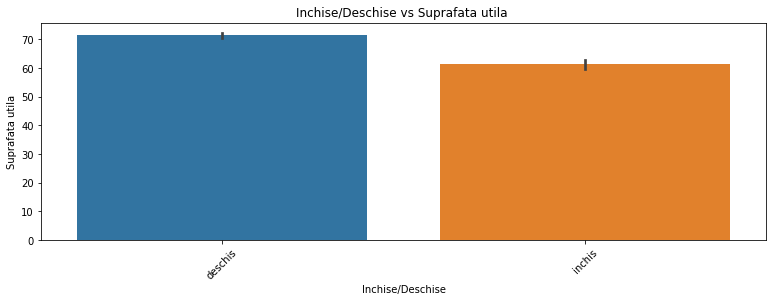

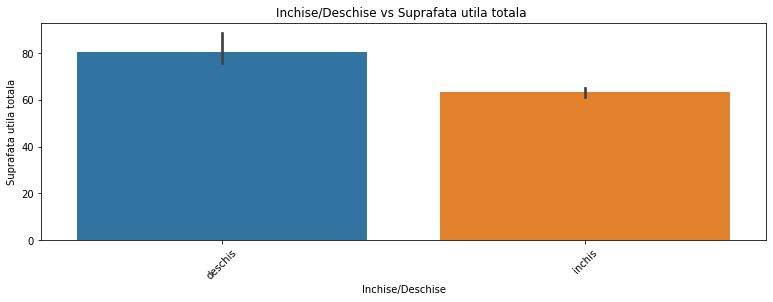

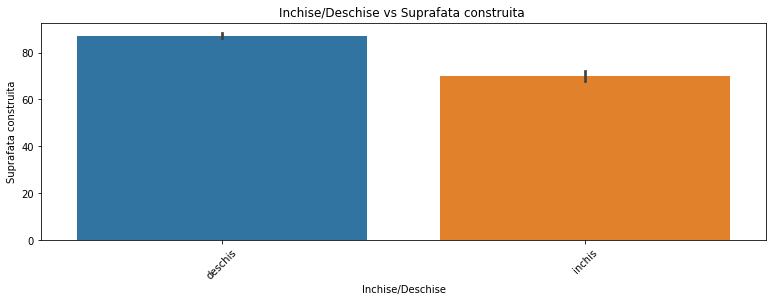

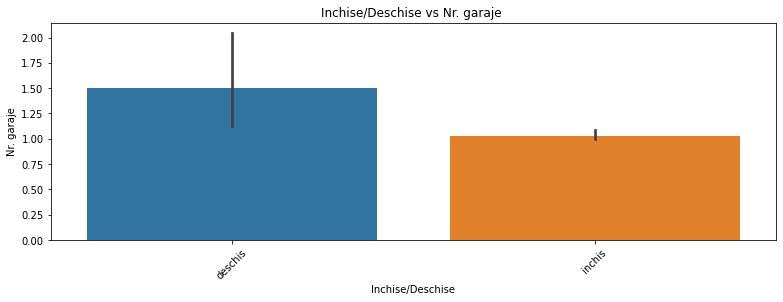

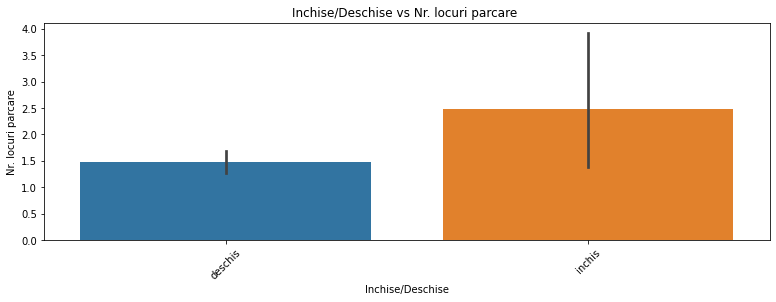

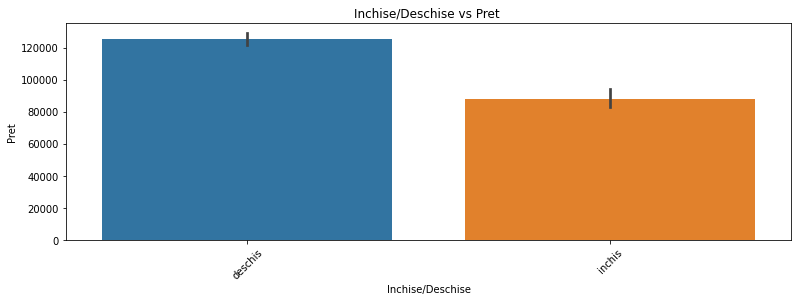

In [23]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']

for feature in categorical_features:
    for feature2 in numerical_features:
        plt.figure(figsize=(13, 4))
        sns.barplot(x=df_copy[feature], y=df_copy[feature2], data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
        plt.title('{0} vs {1} '.format(feature, feature2))
        plt.xticks(rotation=45)
        plt.show()

# ***Missing Values Treatment***

As previously obseverd, the columns in our dataset contain values that are missing. They can reduce the power of our model which in turn leads to wrong predictions. So how do we treat the missing values? From previous analysis on missing data, it appears that the variables 'Nr. garaje', 'Suprafata utila totala', 'Nr. locuri parcare' contain aproximately 95 %, 65 %, respectively 75 % missing values. The choice I made was to drop these columns entirely as they have a very high number of missing values.


In [24]:
df_copy.drop('Nr. garaje', inplace=True, axis=1)
df_copy.drop('Suprafata utila totala', inplace=True, axis=1)
df_copy.drop('Nr. locuri parcare', inplace=True, axis=1)
df_copy.drop('Tip imobil', inplace=True, axis=1)
df_copy.drop('Suprafata utila', inplace=True, axis=1)

## Method 1: fill with whatever value comes directly after 

In [25]:
df_copy_missing_1 = df_copy.copy()
df_copy_missing_1 = df_copy_missing_1.fillna(method = 'bfill', axis=0)
df_copy_missing_1['Structura rezistenta'].fillna('beton', inplace=True)

## Method 2: remove all rows with missing values 

In [26]:
df_copy_missing_2 = df_copy.copy()
df_copy_missing_2 = df_copy_missing_2.dropna(axis=0)

# Outliers

['Nr camere', 'Suprafata construita', 'Pret']


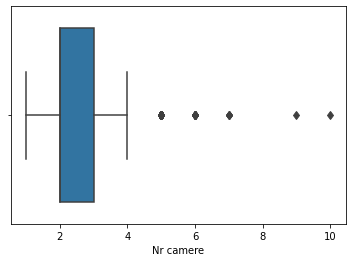

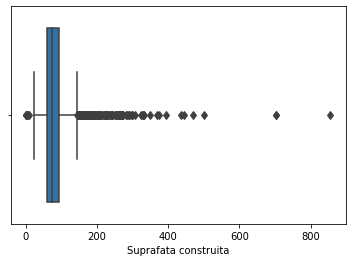

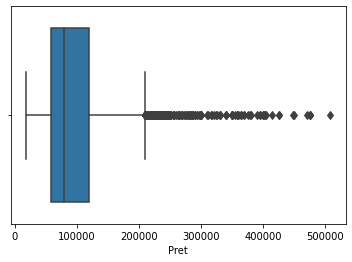

In [27]:
numerical_features = [feature for feature in df_copy.columns if df_copy_missing_2[feature].dtype != 'object'] 
print(numerical_features)

for feature in numerical_features:    
    sns.boxplot(df_copy_missing_2[feature], fliersize=6)
    plt.show()
    Q1 = df_copy_missing_2[feature].quantile(0.25)
    Q3 = df_copy_missing_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df_copy_missing_2 = df_copy_missing_2[(df_copy_missing_2[feature] < Upper_Whisker)]

# ***Encoding Categorical Variables***

In [28]:
categorical_features = [feature for feature in df_copy_missing_2.columns if df_copy_missing_2[feature].dtype == 'object']

le = LabelEncoder()


for feature in categorical_features:
    df_copy_missing_2[feature] =  le.fit_transform(df_copy_missing_2[feature]) 

In [29]:
x = df_copy_missing_2.drop(['Pret'],axis=1) 
y = df_copy_missing_2['Pret'].values

# ***Linear Regression***

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


residual = y_test - y_pred


new_df_linear = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})


test_set_rmse_regression = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
test_set_adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


print('Root square mean error is: {}'.format(test_set_rmse_regression))
print('R square is: {}'.format(test_set_r2))
print('R square adjusted is: {}'.format(test_set_adj_r2))

new_df_linear

Root square mean error is: 25044.37220840005
R square is: 0.5387005769736412
R square adjusted is: 0.5315327723983149


Predicted       Actual
0    63611.49067  55650.00000
1    68398.27062  59000.00000
2    58084.51442  40000.00000
3    90056.38340 106313.00000
4    57255.47859  38800.00000
5    72307.29694  51800.00000
6   105622.05184 115000.00000
7   110137.61947  79900.00000
8   115647.40467 162000.00000
9    63954.99583  65000.00000
10   65714.83279  59033.00000
11  148494.44064 189000.00000
12   67116.26255  53000.00000
13  101763.02995 118000.00000
14   84422.51607  59000.00000
15   86541.47406  80990.00000
16  124003.04433 159900.00000
17   55056.13466  54060.00000
18  152204.75629 149000.00000
19  106519.61841 119225.00000
20  155924.22584 155000.00000
21  124466.36310 182000.00000
22   69832.18582  64000.00000
23   93724.96689  93228.00000
24   73629.12242  68000.00000
25   57817.25408  92500.00000
26   49584.44602  37500.00000
27   94960.38742  79900.00000
28   79986.84579  60500.00000
29  109321.53379  86000.00000
30  138578.13429 143170.00000
31   90326.92768 178000.00000
32   68620.81752  75240.00000
33   45691.37955  57000.00000
34   69552.39460  59375.00000
35   73907.83990  55000.00000
36   83319.88712  69900.00000
37   67865.55222  75000.00000
38   85720.03116 105000.00000
39   57848.04205  69000.00000
40   65969.46609  72672.00000
41   61614.44570  80540.00000
42   99362.56542  78500.00000
43   70711.44633  52000.00000
44   87802.93463 113700.00000
45  100560.40159  76240.00000
46   88954.60235  55170.00000
47   62949.64593  58998.00000
48   85479.07792  54000.00000
49   93684.59493 105000.00000
50   56197.98265  50600.00000
51  121894.67595 112990.00000
52   77275.43082  87000.00000
53   65316.92635  59000.00000
54   37587.13390  46700.00000
55   97038.72218  80000.00000
56   68852.14053  64000.00000
57   82681.07021  79000.00000
58   46667.96028  33900.00000
59   44513.71827  56000.00000
60   58683.55650  37000.00000
61  115826.96551  95900.00000
62   77805.11528 113000.00000
63   36611.82399  44300.00000
64  128720.30820 120000.00000
65   68037.61665  53850.00000
66   92834.99693  88000.00000
67  101680.46830 180000.00000
68  110091.71308 136000.00000
69   89777.41345 123000.00000
70   76902.36517 155000.00000
71  120978.97485 201000.00000
72   61737.55236  40100.00000
73   77995.32753  90200.00000
74  100449.65810  97000.00000
75   61678.01841  89000.00000
76   52029.23941  56000.00000
77   49386.73880  69500.00000
78   66054.32884 125000.00000
79   83460.50379  63000.00000
80   91163.95582  68999.00000
81  120890.18685 127000.00000
82   77593.25375  55000.00000
83  111661.20241 105300.00000
84   85009.31204  87000.00000
85   97223.96482 135000.00000
86   71986.51169  59300.00000
87   66473.40754  74300.00000
88  122753.43208 125000.00000
89   73864.03483  69000.00000
90   65563.16841  80007.00000
91  128583.81982  94286.00000
92   85392.43660 115000.00000
93   61753.03111  53490.00000
94   72933.72455  65000.00000
95   86957.04943  64000.00000
96   74846.47378  56000.00000
97   68425.60396 121000.00000
98   65716.65557  46700.00000
99   97463.24859  79999.00000
100  68160.96708  50900.00000
101 120033.75684 155000.00000
102  94877.46462  91000.00000
103 123977.41101 155402.00000
104  70950.18868  65000.00000
105  97962.76992  76500.00000
106  98555.73471 140000.00000
107  59507.65820  56000.00000
108  85107.90757  77900.00000
109  69306.00128  47000.00000
110 110834.38938  75000.00000
111  44915.72088  69500.00000
112  76299.01452  75240.00000
113  59759.06815  82000.00000
114 103959.60463  95500.00000
115  42528.87772  51500.00000
116  81792.28438  72500.00000
117  88094.69361  68000.00000
118  95189.94795 121600.00000
119 103922.12319  97000.00000
120  40780.97203  36500.00000
121  70493.57927  96900.00000
122  55550.01861  72000.00000
123  78967.25171  52100.00000
124  60962.40097  52000.00000
125 138285.69232 165000.00000
126  82225.32658  53900.00000
127 153575.66423 180700.00000
128 122912.45493 133500.00000
129  77727.06720  77500.00000
130 112139.92713  93900.00000
131  80504.92751  56900.00000
132 111716.82178 


# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor_ridge = Ridge()
regressor_ridge.n_iter_ = 10000000

regressor_ridge.fit(X_train, y_train)

y_pred = regressor_ridge.predict(X_test)


residual = y_test - y_pred


new_df_ridge = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})


test_set_rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
test_set_adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


print('Root square mean error is: {}'.format(test_set_rmse_ridge))
print('R square is: {}'.format(test_set_r2))
print('R square adjusted is: {}'.format(test_set_adj_r2))

new_df_ridge

Root square mean error is: 25044.427783867617
R square is: 0.5386985296506455
R square adjusted is: 0.5315306932634192


Predicted       Actual
0    63610.06613  55650.00000
1    68391.16903  59000.00000
2    58078.88416  40000.00000
3    90070.97152 106313.00000
4    57248.51596  38800.00000
5    72324.98430  51800.00000
6   105600.27754 115000.00000
7   110121.72153  79900.00000
8   115639.23739 162000.00000
9    63956.10642  65000.00000
10   65718.08458  59033.00000
11  148491.38535 189000.00000
12   67105.71334  53000.00000
13  101740.20652 118000.00000
14   84423.38941  59000.00000
15   86544.99055  80990.00000
16  124014.30936 159900.00000
17   55054.46982  54060.00000
18  152187.05678 149000.00000
19  106535.54872 119225.00000
20  155924.60279 155000.00000
21  124454.71144 182000.00000
22   69849.90754  64000.00000
23   93732.25632  93228.00000
24   73624.85893  68000.00000
25   57812.92536  92500.00000
26   49572.55053  37500.00000
27   94969.15434  79900.00000
28   79987.19115  60500.00000
29  109291.52831  86000.00000
30  138555.52491 143170.00000
31   90337.72232 178000.00000
32   68635.69970  75240.00000
33   45677.82050  57000.00000
34   69561.02687  59375.00000
35   73915.40194  55000.00000
36   83320.98764  69900.00000
37   67868.12304  75000.00000
38   85721.05016 105000.00000
39   57835.88723  69000.00000
40   65982.93780  72672.00000
41   61626.66653  80540.00000
42   99339.87139  78500.00000
43   70726.59668  52000.00000
44   87799.92468 113700.00000
45  100541.13334  76240.00000
46   88958.52478  55170.00000
47   62935.62575  58998.00000
48   85481.72960  54000.00000
49   93683.37769 105000.00000
50   56210.96993  50600.00000
51  121876.50921 112990.00000
52   77283.36260  87000.00000
53   65316.70964  59000.00000
54   37594.47027  46700.00000
55   97020.92212  80000.00000
56   68875.68419  64000.00000
57   82683.12801  79000.00000
58   46669.45421  33900.00000
59   44518.34984  56000.00000
60   58675.62457  37000.00000
61  115803.69243  95900.00000
62   77829.63961 113000.00000
63   36617.84759  44300.00000
64  128711.95733 120000.00000
65   68053.30372  53850.00000
66   92846.67977  88000.00000
67  101651.91809 180000.00000
68  110076.20045 136000.00000
69   89787.66999 123000.00000
70   76925.62531 155000.00000
71  120974.49307 201000.00000
72   61753.77266  40100.00000
73   78010.81778  90200.00000
74  100446.55982  97000.00000
75   61689.16657  89000.00000
76   52015.93123  56000.00000
77   49371.09075  69500.00000
78   66071.79143 125000.00000
79   83452.60747  63000.00000
80   91200.20267  68999.00000
81  120870.39405 127000.00000
82   77591.35593  55000.00000
83  111656.19669 105300.00000
84   85001.21991  87000.00000
85   97194.22984 135000.00000
86   72004.84836  59300.00000
87   66486.94644  74300.00000
88  122753.87452 125000.00000
89   73871.53236  69000.00000
90   65564.22867  80007.00000
91  128574.07687  94286.00000
92   85426.65417 115000.00000
93   61749.58937  53490.00000
94   72956.30065  65000.00000
95   86966.76809  64000.00000
96   74842.27719  56000.00000
97   68422.05778 121000.00000
98   65716.45595  46700.00000
99   97467.28605  79999.00000
100  68160.93366  50900.00000
101 120020.55421 155000.00000
102  94895.78515  91000.00000
103 123978.31294 155402.00000
104  70946.71325  65000.00000
105  97946.44161  76500.00000
106  98526.72316 140000.00000
107  59522.56604  56000.00000
108  85113.93012  77900.00000
109  69300.19017  47000.00000
110 110821.40347  75000.00000
111  44904.43234  69500.00000
112  76313.93568  75240.00000
113  59771.85344  82000.00000
114 103954.75585  95500.00000
115  42533.92279  51500.00000
116  81806.40842  72500.00000
117  88092.21441  68000.00000
118  95201.16924 121600.00000
119 103912.87908  97000.00000
120  40786.54669  36500.00000
121  70490.56466  96900.00000
122  55563.70408  72000.00000
123  78972.78876  52100.00000
124  60973.61479  52000.00000
125 138301.59911 165000.00000
126  82226.24410  53900.00000
127 153561.39431 180700.00000
128 122894.07258 133500.00000
129  77725.08483  77500.00000
130 112142.86241  93900.00000
131  80511.70554  56900.00000
132 111752.45604 

# Lasso Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor_lasso = LinearRegression()
regressor_lasso.fit(X_train, y_train)

y_pred = regressor_lasso.predict(X_test)


residual = y_test - y_pred



new_df_lasso = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})


test_set_rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
test_set_adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


print('Root square mean error is: {}'.format(test_set_rmse_lasso))
print('R square is: {}'.format(test_set_r2))
print('R square adjusted is: {}'.format(test_set_adj_r2))

new_df_lasso 

Root square mean error is: 25044.37220840005
R square is: 0.5387005769736412
R square adjusted is: 0.5315327723983149


Predicted       Actual
0    63611.49067  55650.00000
1    68398.27062  59000.00000
2    58084.51442  40000.00000
3    90056.38340 106313.00000
4    57255.47859  38800.00000
5    72307.29694  51800.00000
6   105622.05184 115000.00000
7   110137.61947  79900.00000
8   115647.40467 162000.00000
9    63954.99583  65000.00000
10   65714.83279  59033.00000
11  148494.44064 189000.00000
12   67116.26255  53000.00000
13  101763.02995 118000.00000
14   84422.51607  59000.00000
15   86541.47406  80990.00000
16  124003.04433 159900.00000
17   55056.13466  54060.00000
18  152204.75629 149000.00000
19  106519.61841 119225.00000
20  155924.22584 155000.00000
21  124466.36310 182000.00000
22   69832.18582  64000.00000
23   93724.96689  93228.00000
24   73629.12242  68000.00000
25   57817.25408  92500.00000
26   49584.44602  37500.00000
27   94960.38742  79900.00000
28   79986.84579  60500.00000
29  109321.53379  86000.00000
30  138578.13429 143170.00000
31   90326.92768 178000.00000
32   68620.81752  75240.00000
33   45691.37955  57000.00000
34   69552.39460  59375.00000
35   73907.83990  55000.00000
36   83319.88712  69900.00000
37   67865.55222  75000.00000
38   85720.03116 105000.00000
39   57848.04205  69000.00000
40   65969.46609  72672.00000
41   61614.44570  80540.00000
42   99362.56542  78500.00000
43   70711.44633  52000.00000
44   87802.93463 113700.00000
45  100560.40159  76240.00000
46   88954.60235  55170.00000
47   62949.64593  58998.00000
48   85479.07792  54000.00000
49   93684.59493 105000.00000
50   56197.98265  50600.00000
51  121894.67595 112990.00000
52   77275.43082  87000.00000
53   65316.92635  59000.00000
54   37587.13390  46700.00000
55   97038.72218  80000.00000
56   68852.14053  64000.00000
57   82681.07021  79000.00000
58   46667.96028  33900.00000
59   44513.71827  56000.00000
60   58683.55650  37000.00000
61  115826.96551  95900.00000
62   77805.11528 113000.00000
63   36611.82399  44300.00000
64  128720.30820 120000.00000
65   68037.61665  53850.00000
66   92834.99693  88000.00000
67  101680.46830 180000.00000
68  110091.71308 136000.00000
69   89777.41345 123000.00000
70   76902.36517 155000.00000
71  120978.97485 201000.00000
72   61737.55236  40100.00000
73   77995.32753  90200.00000
74  100449.65810  97000.00000
75   61678.01841  89000.00000
76   52029.23941  56000.00000
77   49386.73880  69500.00000
78   66054.32884 125000.00000
79   83460.50379  63000.00000
80   91163.95582  68999.00000
81  120890.18685 127000.00000
82   77593.25375  55000.00000
83  111661.20241 105300.00000
84   85009.31204  87000.00000
85   97223.96482 135000.00000
86   71986.51169  59300.00000
87   66473.40754  74300.00000
88  122753.43208 125000.00000
89   73864.03483  69000.00000
90   65563.16841  80007.00000
91  128583.81982  94286.00000
92   85392.43660 115000.00000
93   61753.03111  53490.00000
94   72933.72455  65000.00000
95   86957.04943  64000.00000
96   74846.47378  56000.00000
97   68425.60396 121000.00000
98   65716.65557  46700.00000
99   97463.24859  79999.00000
100  68160.96708  50900.00000
101 120033.75684 155000.00000
102  94877.46462  91000.00000
103 123977.41101 155402.00000
104  70950.18868  65000.00000
105  97962.76992  76500.00000
106  98555.73471 140000.00000
107  59507.65820  56000.00000
108  85107.90757  77900.00000
109  69306.00128  47000.00000
110 110834.38938  75000.00000
111  44915.72088  69500.00000
112  76299.01452  75240.00000
113  59759.06815  82000.00000
114 103959.60463  95500.00000
115  42528.87772  51500.00000
116  81792.28438  72500.00000
117  88094.69361  68000.00000
118  95189.94795 121600.00000
119 103922.12319  97000.00000
120  40780.97203  36500.00000
121  70493.57927  96900.00000
122  55550.01861  72000.00000
123  78967.25171  52100.00000
124  60962.40097  52000.00000
125 138285.69232 165000.00000
126  82225.32658  53900.00000
127 153575.66423 180700.00000
128 122912.45493 133500.00000
129  77727.06720  77500.00000
130 112139.92713  93900.00000
131  80504.92751  56900.00000
132 111716.82178 

# ElasticNet

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




parameters_grid = {   "max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                    }

regressor_elasticnet = ElasticNet(selection='random')
grid = GridSearchCV(regressor_elasticnet, parameters_grid, scoring='r2', cv=10)


grid.fit(X_train, y_train)


y_pred = grid.predict(X_test)


residual = y_test - y_pred


new_df_elasticnet = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})


test_set_rmse_elastic = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
test_set_adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


print('Root square mean error is: {}'.format(test_set_rmse_elastic))
print('R square is: {}'.format(test_set_r2))
print('R square adjusted is: {}'.format(test_set_adj_r2))

new_df_elasticnet

Root square mean error is: 25074.085484396262
R square is: 0.5376053330636014
R square adjusted is: 0.5304205102699171


Predicted       Actual
0    63603.69559  55650.00000
1    68672.37508  59000.00000
2    58637.79112  40000.00000
3    89083.38279 106313.00000
4    57792.56465  38800.00000
5    72692.55269  51800.00000
6   107395.73197 115000.00000
7   111773.61400  79900.00000
8   116003.39337 162000.00000
9    64039.94965  65000.00000
10   65086.80930  59033.00000
11  147471.60985 189000.00000
12   67508.80589  53000.00000
13  104124.58301 118000.00000
14   84034.76546  59000.00000
15   85581.82260  80990.00000
16  124661.18747 159900.00000
17   55073.92479  54060.00000
18  152471.91811 149000.00000
19  105367.75400 119225.00000
20  154145.48944 155000.00000
21  125452.65489 182000.00000
22   70239.57427  64000.00000
23   92779.67560  93228.00000
24   73221.92046  68000.00000
25   58340.42768  92500.00000
26   50461.60019  37500.00000
27   93277.71304  79900.00000
28   79451.30054  60500.00000
29  110833.27127  86000.00000
30  139369.22628 143170.00000
31   88503.09253 178000.00000
32   68108.14164  75240.00000
33   46644.40713  57000.00000
34   69811.93397  59375.00000
35   72609.97623  55000.00000
36   82855.32152  69900.00000
37   67515.41858  75000.00000
38   85187.14015 105000.00000
39   58487.55478  69000.00000
40   65599.54108  72672.00000
41   61396.33651  80540.00000
42  101732.18732  78500.00000
43   70817.69967  52000.00000
44   87110.06766 113700.00000
45  102571.89886  76240.00000
46   87597.38387  55170.00000
47   62863.79001  58998.00000
48   84659.50189  54000.00000
49   93035.28775 105000.00000
50   55946.68476  50600.00000
51  122565.84329 112990.00000
52   75759.38827  87000.00000
53   65113.02203  59000.00000
54   39109.30148  46700.00000
55   99107.83250  80000.00000
56   69152.32523  64000.00000
57   81926.98411  79000.00000
58   47363.55690  33900.00000
59   46070.93859  56000.00000
60   59413.62290  37000.00000
61  116841.51636  95900.00000
62   77139.07565 113000.00000
63   38357.34189  44300.00000
64  129102.58185 120000.00000
65   67264.06646  53850.00000
66   91080.87907  88000.00000
67  104154.40240 180000.00000
68  111591.14350 136000.00000
69   88215.54260 123000.00000
70   75063.89115 155000.00000
71  122358.03515 201000.00000
72   62447.71970  40100.00000
73   77355.89244  90200.00000
74   99749.63598  97000.00000
75   61876.62692  89000.00000
76   52755.48822  56000.00000
77   50286.07254  69500.00000
78   66270.77982 125000.00000
79   83945.77344  63000.00000
80   90623.69495  68999.00000
81  121450.99495 127000.00000
82   77596.01473  55000.00000
83  112186.17866 105300.00000
84   83904.52790  87000.00000
85   99751.68092 135000.00000
86   72181.28049  59300.00000
87   66167.76841  74300.00000
88  124155.72880 125000.00000
89   72553.91409  69000.00000
90   65464.31374  80007.00000
91  128445.75154  94286.00000
92   84358.61309 115000.00000
93   62140.63981  53490.00000
94   72859.88701  65000.00000
95   85126.64946  64000.00000
96   74639.13658  56000.00000
97   68290.05035 121000.00000
98   65502.13852  46700.00000
99   96282.89597  79999.00000
100  68095.92785  50900.00000
101 120945.51286 155000.00000
102  93004.24539  91000.00000
103 124687.17217 155402.00000
104  70684.48943  65000.00000
105  99807.77941  76500.00000
106 100900.66966 140000.00000
107  60568.33864  56000.00000
108  84496.37250  77900.00000
109  69701.09638  47000.00000
110 111854.91639  75000.00000
111  45685.77588  69500.00000
112  75570.80304  75240.00000
113  59801.30691  82000.00000
114 105549.59848  95500.00000
115  44109.52507  51500.00000
116  80432.37006  72500.00000
117  86898.63503  68000.00000
118  94298.00894 121600.00000
119 105597.97106  97000.00000
120  42372.36429  36500.00000
121  70315.14939  96900.00000
122  56641.11645  72000.00000
123  78063.80505  52100.00000
124  61617.75418  52000.00000
125 137784.37176 165000.00000
126  81650.02544  53900.00000
127 154121.12804 180700.00000
128 124440.21448 133500.00000
129  76901.10344  77500.00000
130 113982.74015  93900.00000
131  79277.29225  56900.00000
132 107903.82132 

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

Nr camere  Suprafata construita  Compartimentare  Confort    Etaj  \
vif   28.48894              41.69613          3.84089  1.46386 3.93044   

     Nr. bucatarii  Nr. bai  An constructie  Structura rezistenta  \
vif        1.01422  2.53603        16.02775               9.42370   

     Regim inaltime  Nr. balcoane    Zona  Finalizat/In constructie  \
vif         5.43034       1.70985 3.08408                   1.53735   

     Inchise/Deschise  
vif           1.38412